# MSE1065 - FINAL COURSE PROJECT

# PREDICTING PROPERTIES OF STEEL USING MACHINE LEARNING TECHNIQUES

## TEAM MEMBERS:
## HARSH PANCHAL(1005661507)
## LALITHA GHATTI  (1006062813)


#### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import sklearn 
from scipy import stats
from scipy.io import loadmat
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPRegressor

C:\Users\Panch\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\Panch\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
Using TensorFlow backend.


In [2]:
processed_data = loadmat('processed_data.mat') # IMPORTING MAT DATA FILE

In [3]:
processed_data # PROCESSED DATA

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Nov 28 16:39:41 2018',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.235e+03, 8.700e+02, 5.850e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.216e+03, 8.680e+02, 5.900e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [1.205e+03, 8.710e+02, 5.880e+02, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [1.203e+03, 8.510e+02, 5.210e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00],
        [1.193e+03, 8.380e+02, 5.310e+02, ..., 4.720e-03, 1.550e-03,
         0.000e+00],
        [1.246e+03, 8.100e+02, 5.440e+02, ..., 4.500e-03, 1.480e-03,
         0.000e+00]]),
 'Y': array([[400. , 505. ,  35. ],
        [398. , 500. ,  36. ],
        [396. , 497. ,  36.5],
        ...,
        [462. , 571. ,  27.5],
        [464. , 577. ,  29. ],
        [510. , 613. ,  25.5]])}

In [4]:
# CONVERTING DATA INTO DATAFRAME
df = pd.DataFrame(np.hstack((processed_data['X'], processed_data['Y'])))

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1235.0,870.0,585.0,6.0,1500.0,0.0028,0.2774,0.1265,0.4813,0.0032,...,0.0001,0.2690,0.1488,0.0001,0.0,0.0,0.0,400.0,505.0,35.0
1,1216.0,868.0,590.0,6.0,1500.0,0.0042,0.2797,0.1389,0.4970,0.0035,...,0.0001,0.2766,0.1523,0.0001,0.0,0.0,0.0,398.0,500.0,36.0
2,1205.0,871.0,588.0,8.0,1500.0,0.0042,0.2797,0.1389,0.4970,0.0035,...,0.0001,0.2766,0.1523,0.0001,0.0,0.0,0.0,396.0,497.0,36.5
3,1202.0,855.0,583.0,10.0,1500.0,0.0042,0.2797,0.1389,0.4970,0.0035,...,0.0001,0.2766,0.1523,0.0001,0.0,0.0,0.0,396.0,506.0,35.0
4,1207.0,855.0,599.0,12.0,1500.0,0.0042,0.2739,0.1352,0.5041,0.0039,...,0.0001,0.2965,0.1733,0.0001,0.0,0.0,0.0,389.0,513.0,31.0


In [6]:
df.shape # SHAPE OF THE DATAFRAME

(63162, 30)

#### RENAMING THE FEATURES WITH ITS ORIGINAL NAME 

In [7]:
df = df.rename(columns={0: "Furnace Temperature", 1: "Exit Temperature",2: "Annealing Temperature",3: "Thickness",
                  4: "Width",5: "Sulfur content(S)",6: "Copper content (Cu)",7: "Nickel content (Ni)",
                  8: "Chromium content (Cr)",9: "Molybdenum content (Mo)",10: "Vanadium content (V)",
                  11: "Niobium content (Nb)",12: "Total Aluminum content (Al)",13: "Acid soluble Aluminum content",
                  14: "Titanium content (Ti)",15: "Boron content (B)",16: "Tin content (Sn)",17: "Arsenic content (As)",
                  18: "Zirconium content (Zr)",19: "Calcium content (Ca)",20: "Lead content (Pb)",
                  21: "Ceq (Carbon Equivalent #1)",22: "Pcm (Carbon Equivalent #2)",23: "Antimony content (Sb)",
                  24: "Nitrogen content (N)",25: "Oxygen content (O)",26: "Tungsten content (W)",
                  27: "TS", 28: "YS",29: "EL",})

In [8]:
df.head() # PRINTING DATAFRAME AFTER RENAMING

,Furnace Temperature,Exit Temperature,Annealing Temperature,Thickness,Width,Sulfur content(S),Copper content (Cu),Nickel content (Ni),Chromium content (Cr),Molybdenum content (Mo),...,Lead content (Pb),Ceq (Carbon Equivalent #1),Pcm (Carbon Equivalent #2),Antimony content (Sb),Nitrogen content (N),Oxygen content (O),Tungsten content (W),TS,YS,EL
0,1235.0,870.0,585.0,6.0,1500.0,0.0028,0.2774,0.1265,0.4813,0.0032,...,0.0001,0.2690,0.1488,0.0001,0.0,0.0,0.0,400.0,505.0,35.0
1,1216.0,868.0,590.0,6.0,1500.0,0.0042,0.2797,0.1389,0.4970,0.0035,...,0.0001,0.2766,0.1523,0.0001,0.0,0.0,0.0,398.0,500.0,36.0
2,1205.0,871.0,588.0,8.0,1500.0,0.0042,0.2797,0.1389,0.4970,0.0035,...,0.0001,0.2766,0.1523,0.0001,0.0,0.0,0.0,396.0,497.0,36.5
3,1202.0,855.0,583.0,10.0,1500.0,0.0042,0.2797,0.1389,0.4970,0.0035,...,0.0001,0.2766,0.1523,0.0001,0.0,0.0,0.0,396.0,506.0,35.0
4,1207.0,855.0,599.0,12.0,1500.0,0.0042,0.2739,0.1352,0.5041,0.0039,...,0.0001,0.2965,0.1733,0.0001,0.0,0.0,0.0,389.0,513.0,31.0


In [9]:
df.isna().sum() #checking the NaN values in the df

Furnace Temperature              0
Exit Temperature                 0
Annealing Temperature            0
Thickness                        0
Width                            0
Sulfur content(S)                0
Copper content (Cu)              0
Nickel content (Ni)              0
Chromium content (Cr)            0
Molybdenum content (Mo)          0
Vanadium content (V)             0
Niobium content (Nb)             0
Total Aluminum content (Al)      0
Acid soluble Aluminum content    0
Titanium content (Ti)            0
Boron content (B)                0
Tin content (Sn)                 0
Arsenic content (As)             0
Zirconium content (Zr)           0
Calcium content (Ca)             0
Lead content (Pb)                0
Ceq (Carbon Equivalent #1)       0
Pcm (Carbon Equivalent #2)       0
Antimony content (Sb)            0
Nitrogen content (N)             0
Oxygen content (O)               0
Tungsten content (W)             0
TS                               0
YS                  

## CORRELATION MATRIX

 - With the help of correlation matrix, we can have the idea of different correlation between the features as well as the relation of features with the target variables.
 
 - NOTE: In the correlation matrix, all target variables are highly correlated with each other. This indicates that properties tensile strength, yield strength and elongation are depended on each other. As in the given case, these properties are target variables, we are only considering its correlation with features.    

In [10]:
corr = df.corr() # CORRELATION MATRIX
corr.head(3)

,Furnace Temperature,Exit Temperature,Annealing Temperature,Thickness,Width,Sulfur content(S),Copper content (Cu),Nickel content (Ni),Chromium content (Cr),Molybdenum content (Mo),...,Lead content (Pb),Ceq (Carbon Equivalent #1),Pcm (Carbon Equivalent #2),Antimony content (Sb),Nitrogen content (N),Oxygen content (O),Tungsten content (W),TS,YS,EL
Furnace Temperature,1.000000,-0.103037,-0.252051,-0.017460,0.117392,-0.205310,0.284360,0.116603,0.207280,0.042601,...,0.100427,0.336648,0.232580,0.088406,0.080976,-0.048000,0.008627,0.445377,0.381261,-0.324465
Exit Temperature,-0.103037,1.000000,0.674397,-0.329742,-0.072737,0.310953,-0.093852,-0.071200,-0.041235,0.060566,...,-0.017309,-0.417002,-0.351956,0.020772,-0.210802,0.213371,-0.000634,-0.510979,-0.456987,0.539095
Annealing Temperature,-0.252051,0.674397,1.000000,-0.314457,-0.075817,0.257125,-0.087697,-0.056769,-0.001559,0.106554,...,-0.063726,-0.406293,-0.284543,0.035741,-0.228607,0.251921,0.013849,-0.575564,-0.478121,0.527404


### CORRELATION OF FEATURES WITH TS TARGET VARIABLE

- As we can see that tensile strength is highly correlated with ceq(carbon equivalent #1) with correlation coefficient of 0.8. It is also positively correlated with pcm(carbon equivalent #2), Niobium content and sulfur content with 0.64, 0.6 and 0.61 correlation coefficients respectively. We can infer that tensile strength of the steel is highly depended on these features. 

In [11]:
corr_TS = abs(corr["TS"]) # correlation w.r.t tensile strength 

# Finding relevant features by filtering our correlation matrix with the features which has greater than 0.2 correlation with target data
relevant_features_TS = corr_TS[corr_TS>0.2]
relevant_features_TS =pd.DataFrame(relevant_features_TS)


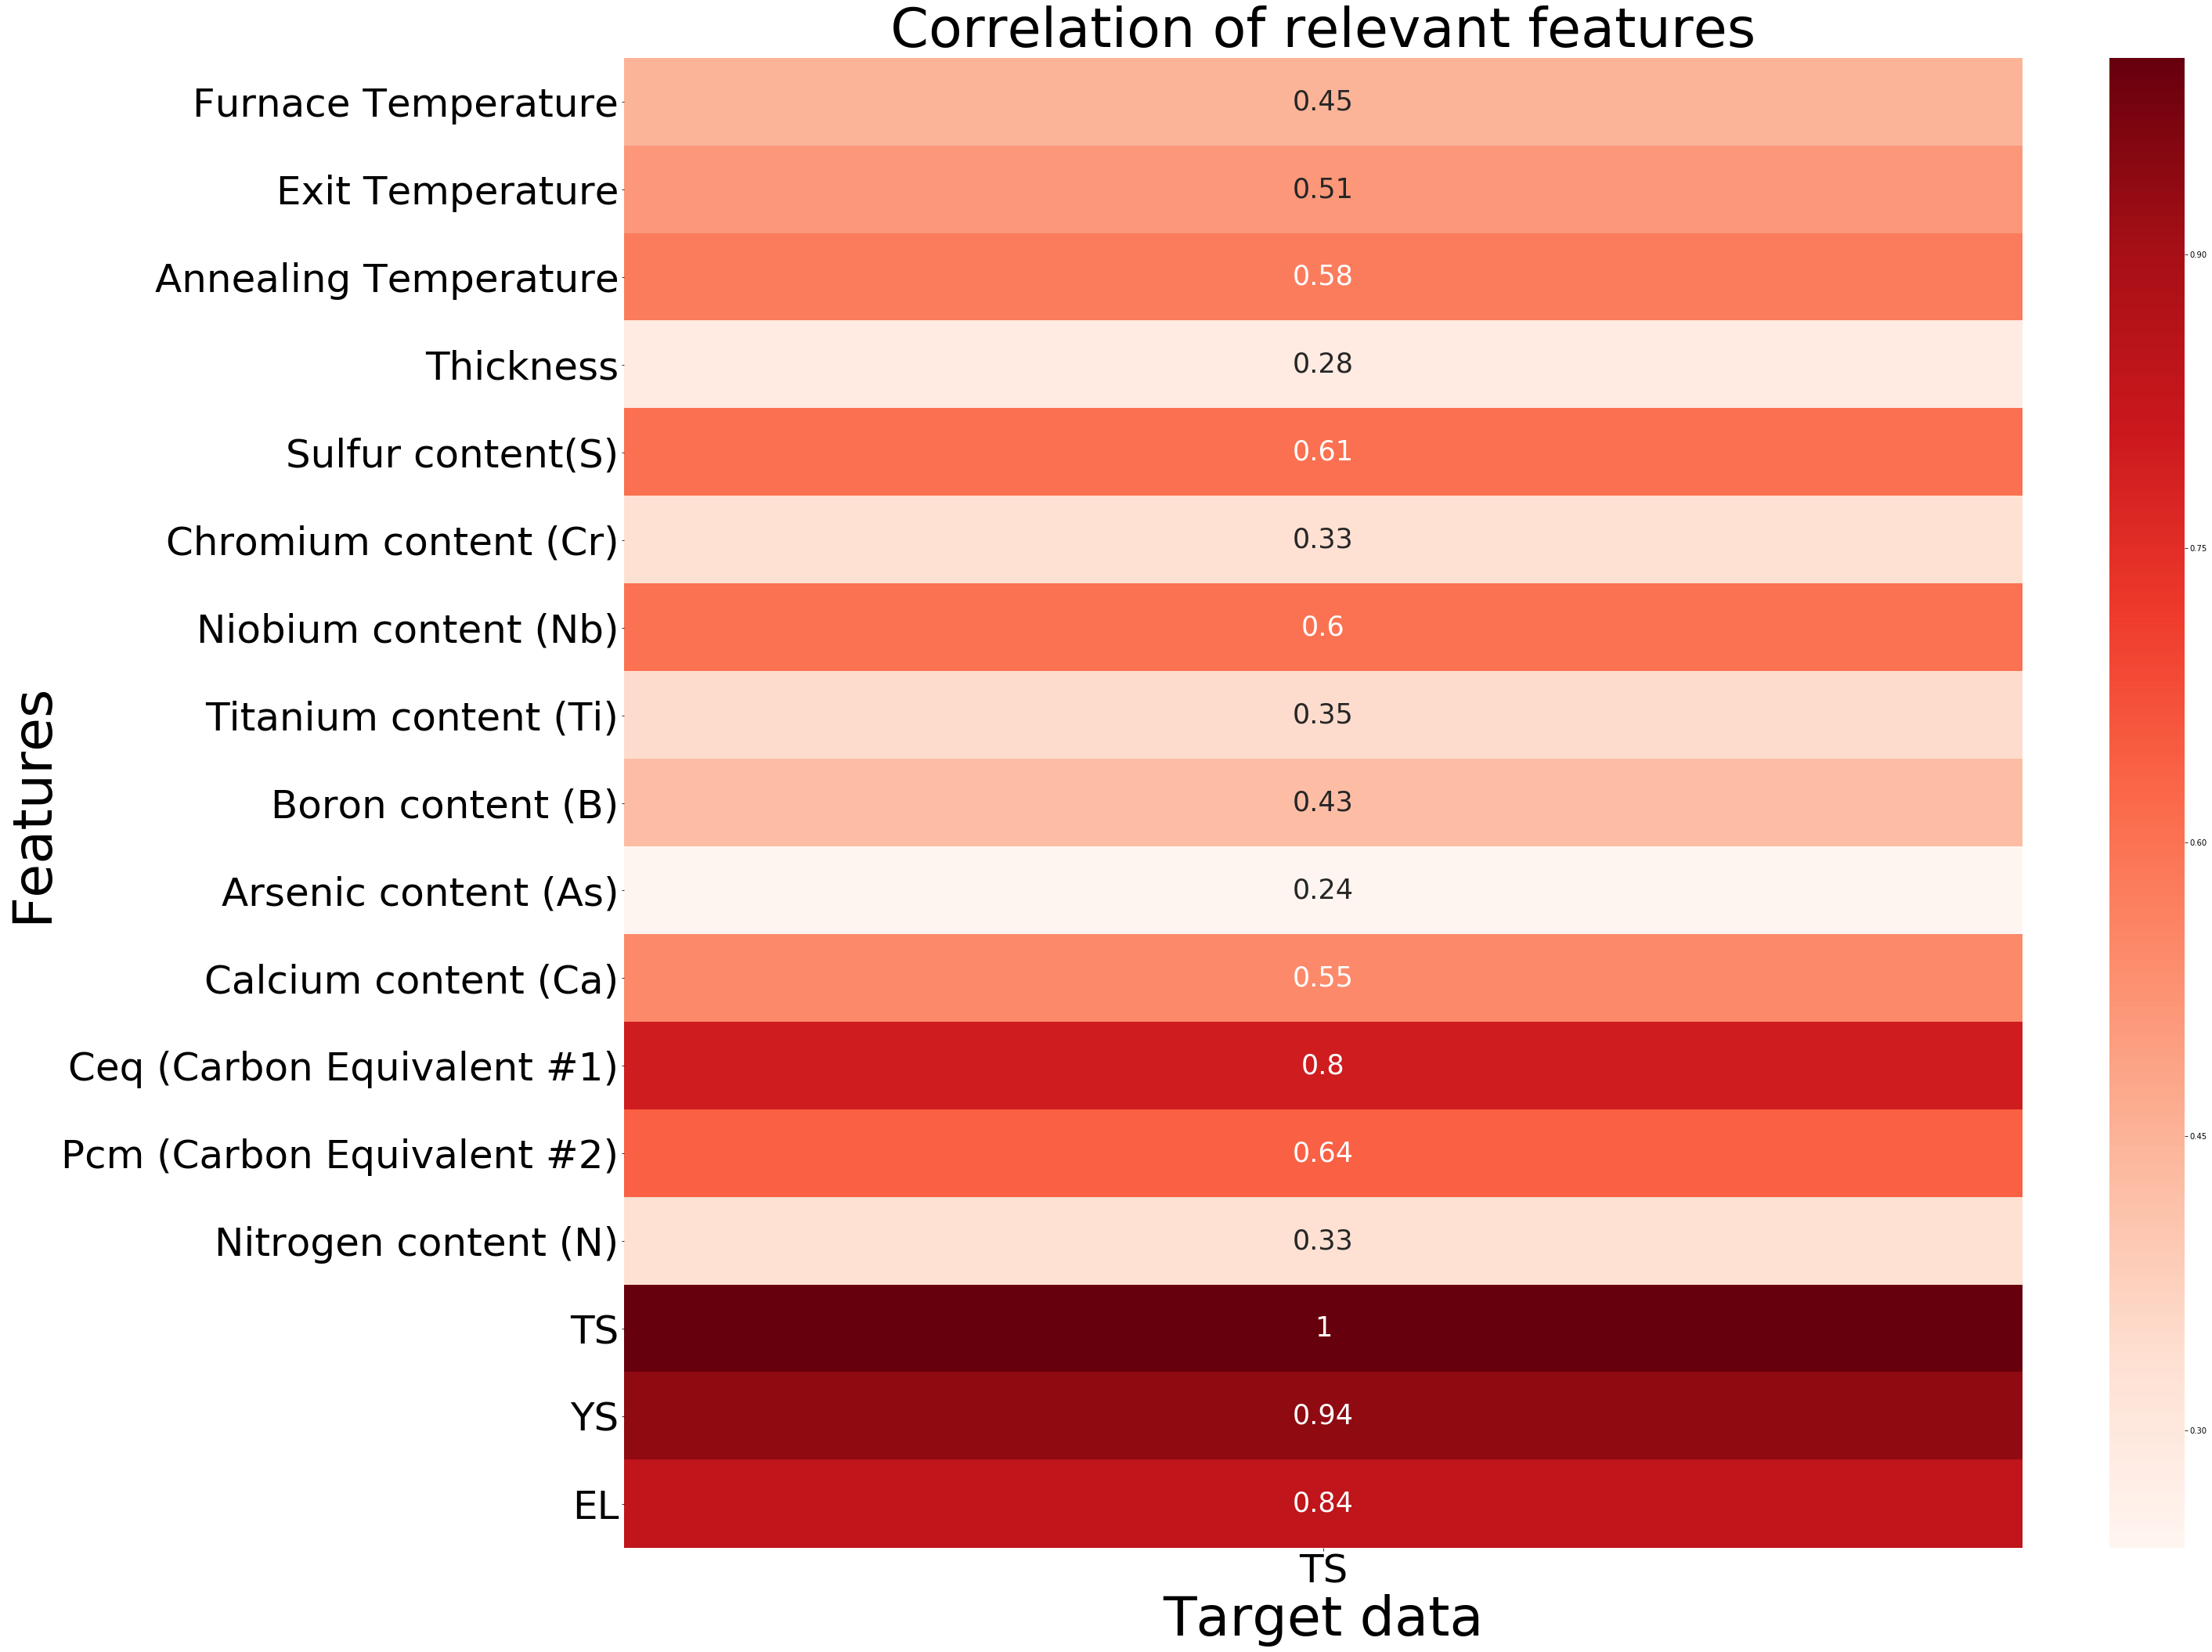

In [12]:
# plotting the heat map of relevant features for tensile strength

plt.figure(figsize=(40,35))
sns.heatmap(relevant_features_TS, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 35})
plt.title(' Correlation of relevant features ' , size = 70)
plt.xlabel('Target data',  size = 70)
plt.ylabel('Features',  size = 70)
plt.xticks(size=50)
plt.yticks(size=50)
plt.show()

### CORRELATION OF FEATURES WITH YS TARGET VARIABLE

- As we can see that yield strength is highly correlated with ceq(carbon equivalent #1) with correlation coefficient of 0.93. It is also positively correlated with pcm(carbon equivalent #2), sulfur content and calcium content with 0.84, 0.61 and 0.58 correlation coefficients respectively. We can infer that yield strength of the steel is highly depended on these features. 

In [13]:
corr_YS = abs(corr["YS"]) # correlation w.r.t yield strength 

# Finding relevant features by filtering our correlation matrix with the features which has greater than 0.2 correlation with target data
relevant_features_YS = corr_YS[corr_YS>0.2]
relevant_features_YS =pd.DataFrame(relevant_features_YS)


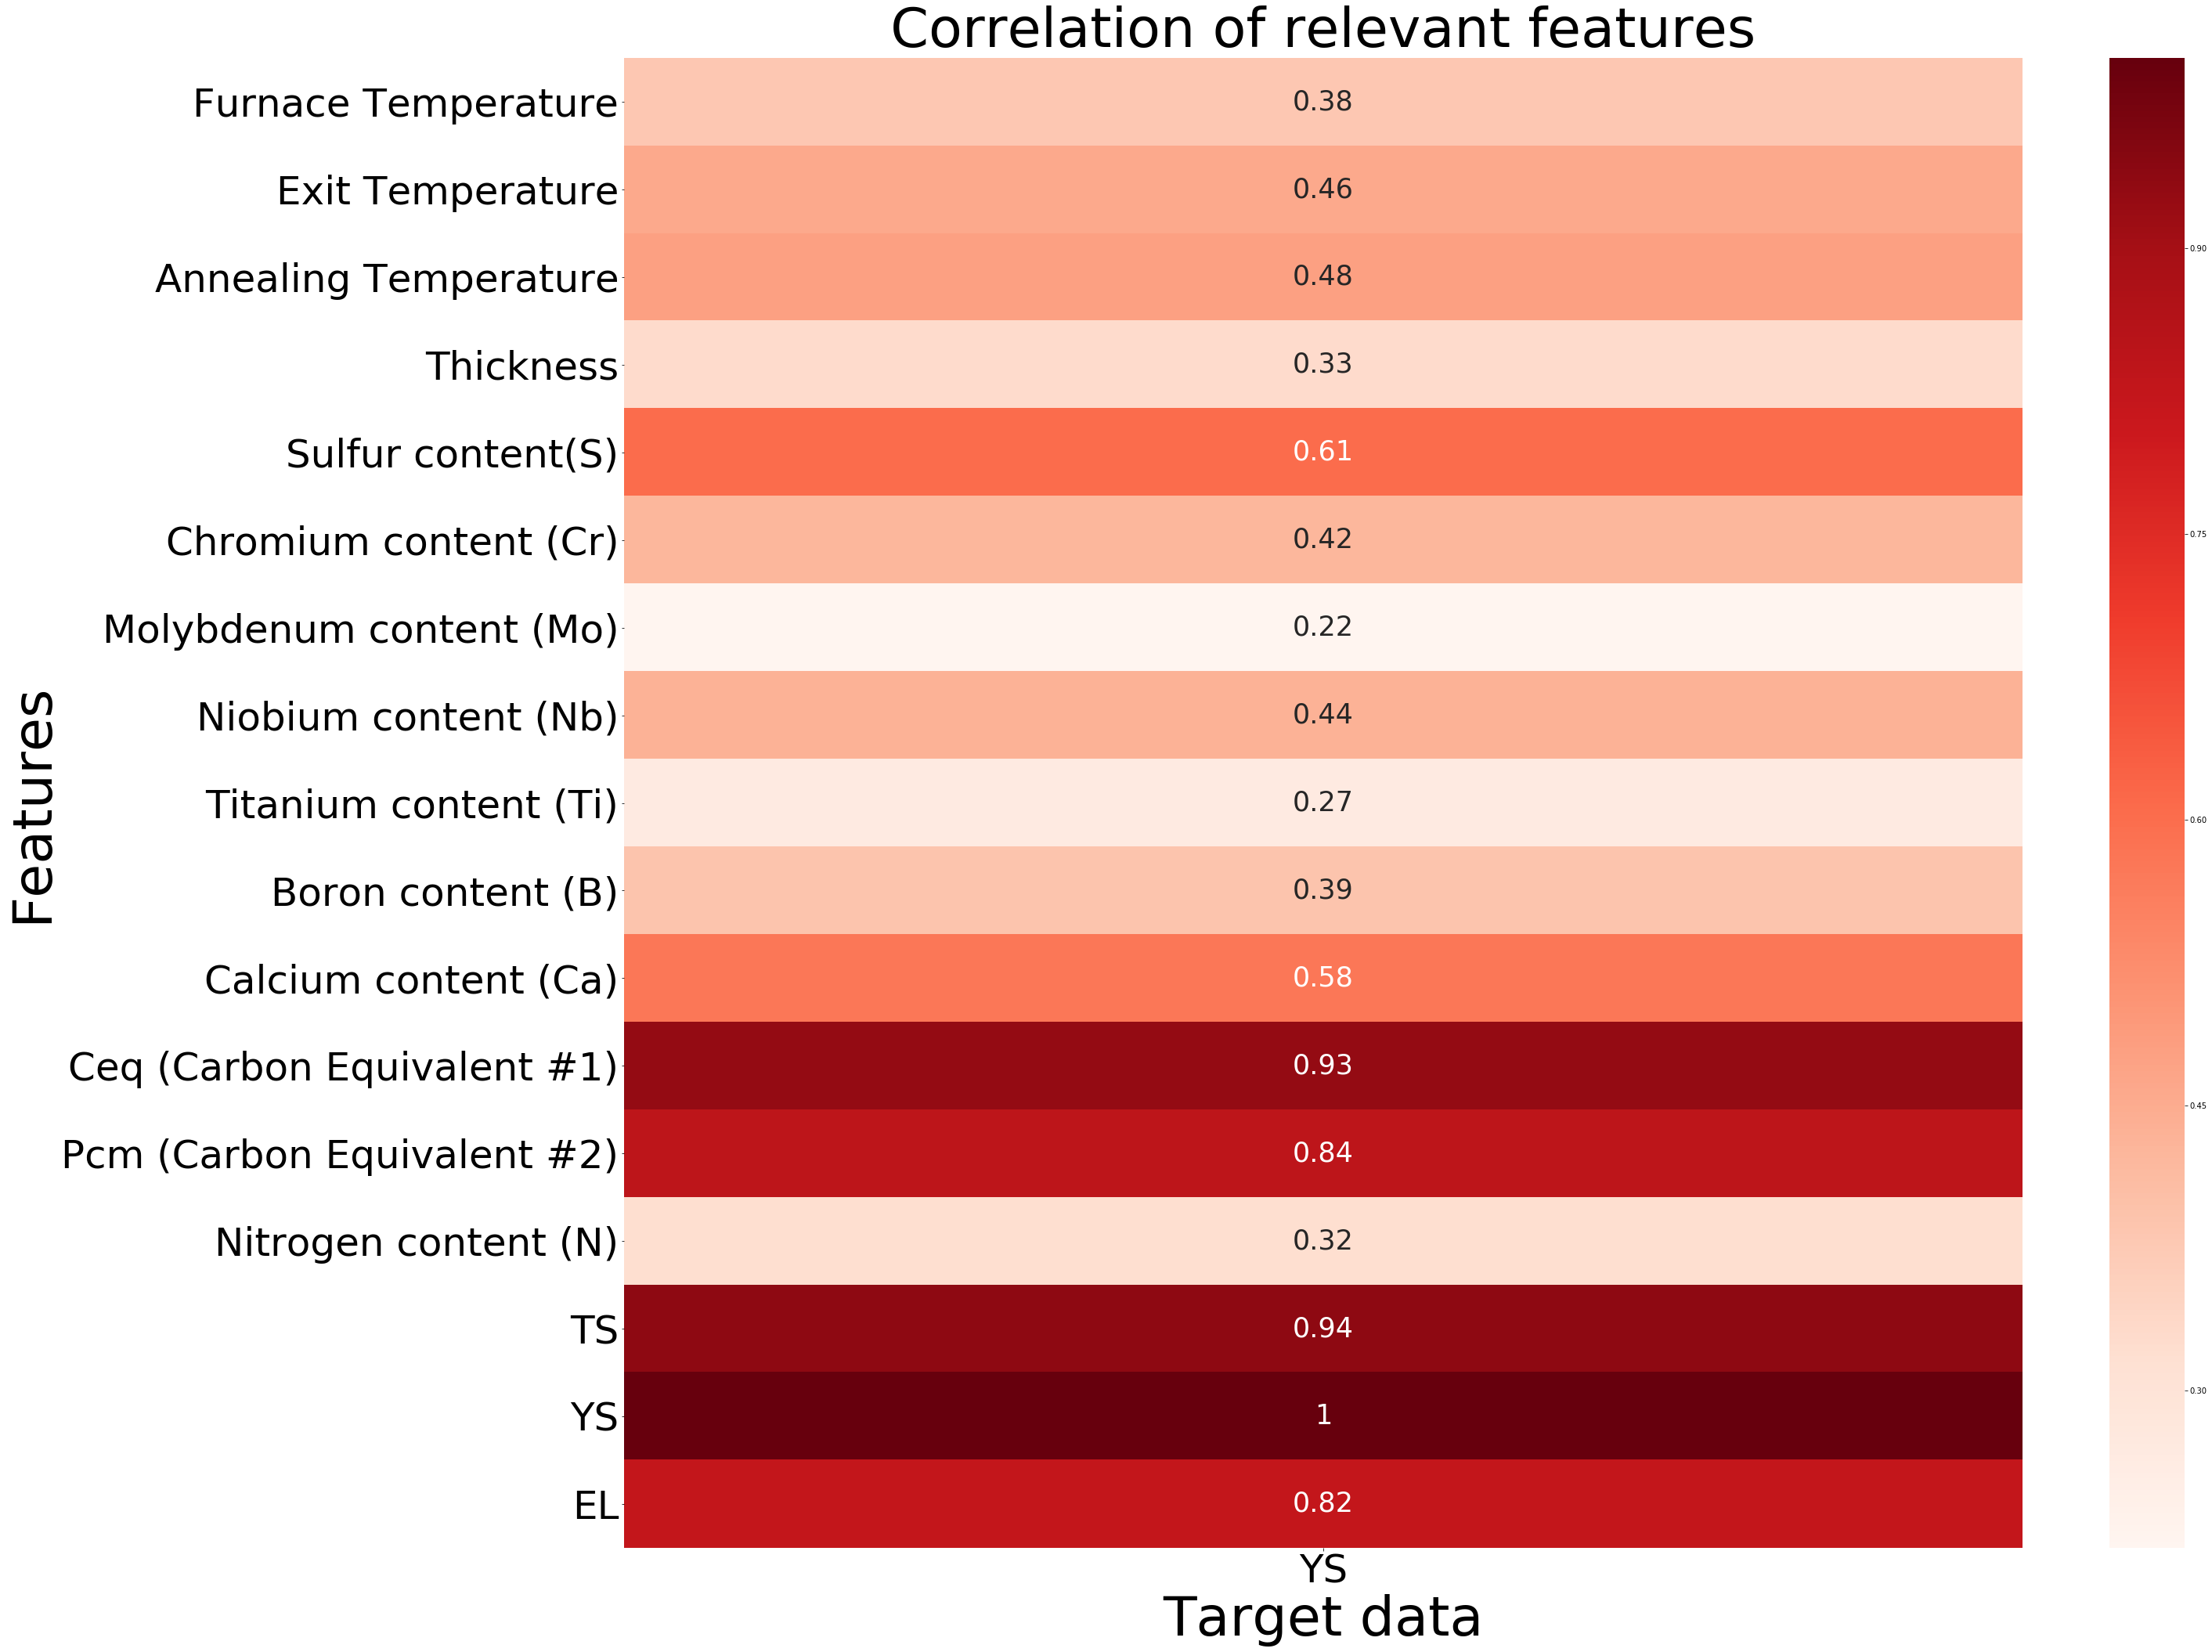

In [14]:
# plotting the heat map of relevant features

plt.figure(figsize=(40,35))
sns.heatmap(relevant_features_YS, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 35})
plt.title(' Correlation of relevant features ' , size = 70)
plt.xlabel('Target data',  size = 70)
plt.ylabel('Features',  size = 70)
plt.xticks(size=50)
plt.yticks(size=50)
plt.show()

### CORRELATION OF FEATURES WITH EL TARGET VARIABLE

- As we can see that elongation is highly correlated with ceq(carbon equivalent #1) with correlation coefficient of 0.73. It is also positively correlated with pcm(carbon equivalent #2), sulfur content, annealing temperature and exit temperature  with 0.62, 0.57, 0.53 and 0.54 correlation coefficients respectively. We can infer that elongation of the steel is highly depended on these features. 

In [15]:
corr_EL = abs(corr["EL"]) # correlation w.r.t elongation

# Finding relevant features by filtering our correlation matrix with the features which has greater than 0.2 correlation with target data
relevant_features_EL = corr_EL[corr_EL>0.2]
relevant_features_EL =pd.DataFrame(relevant_features_EL)


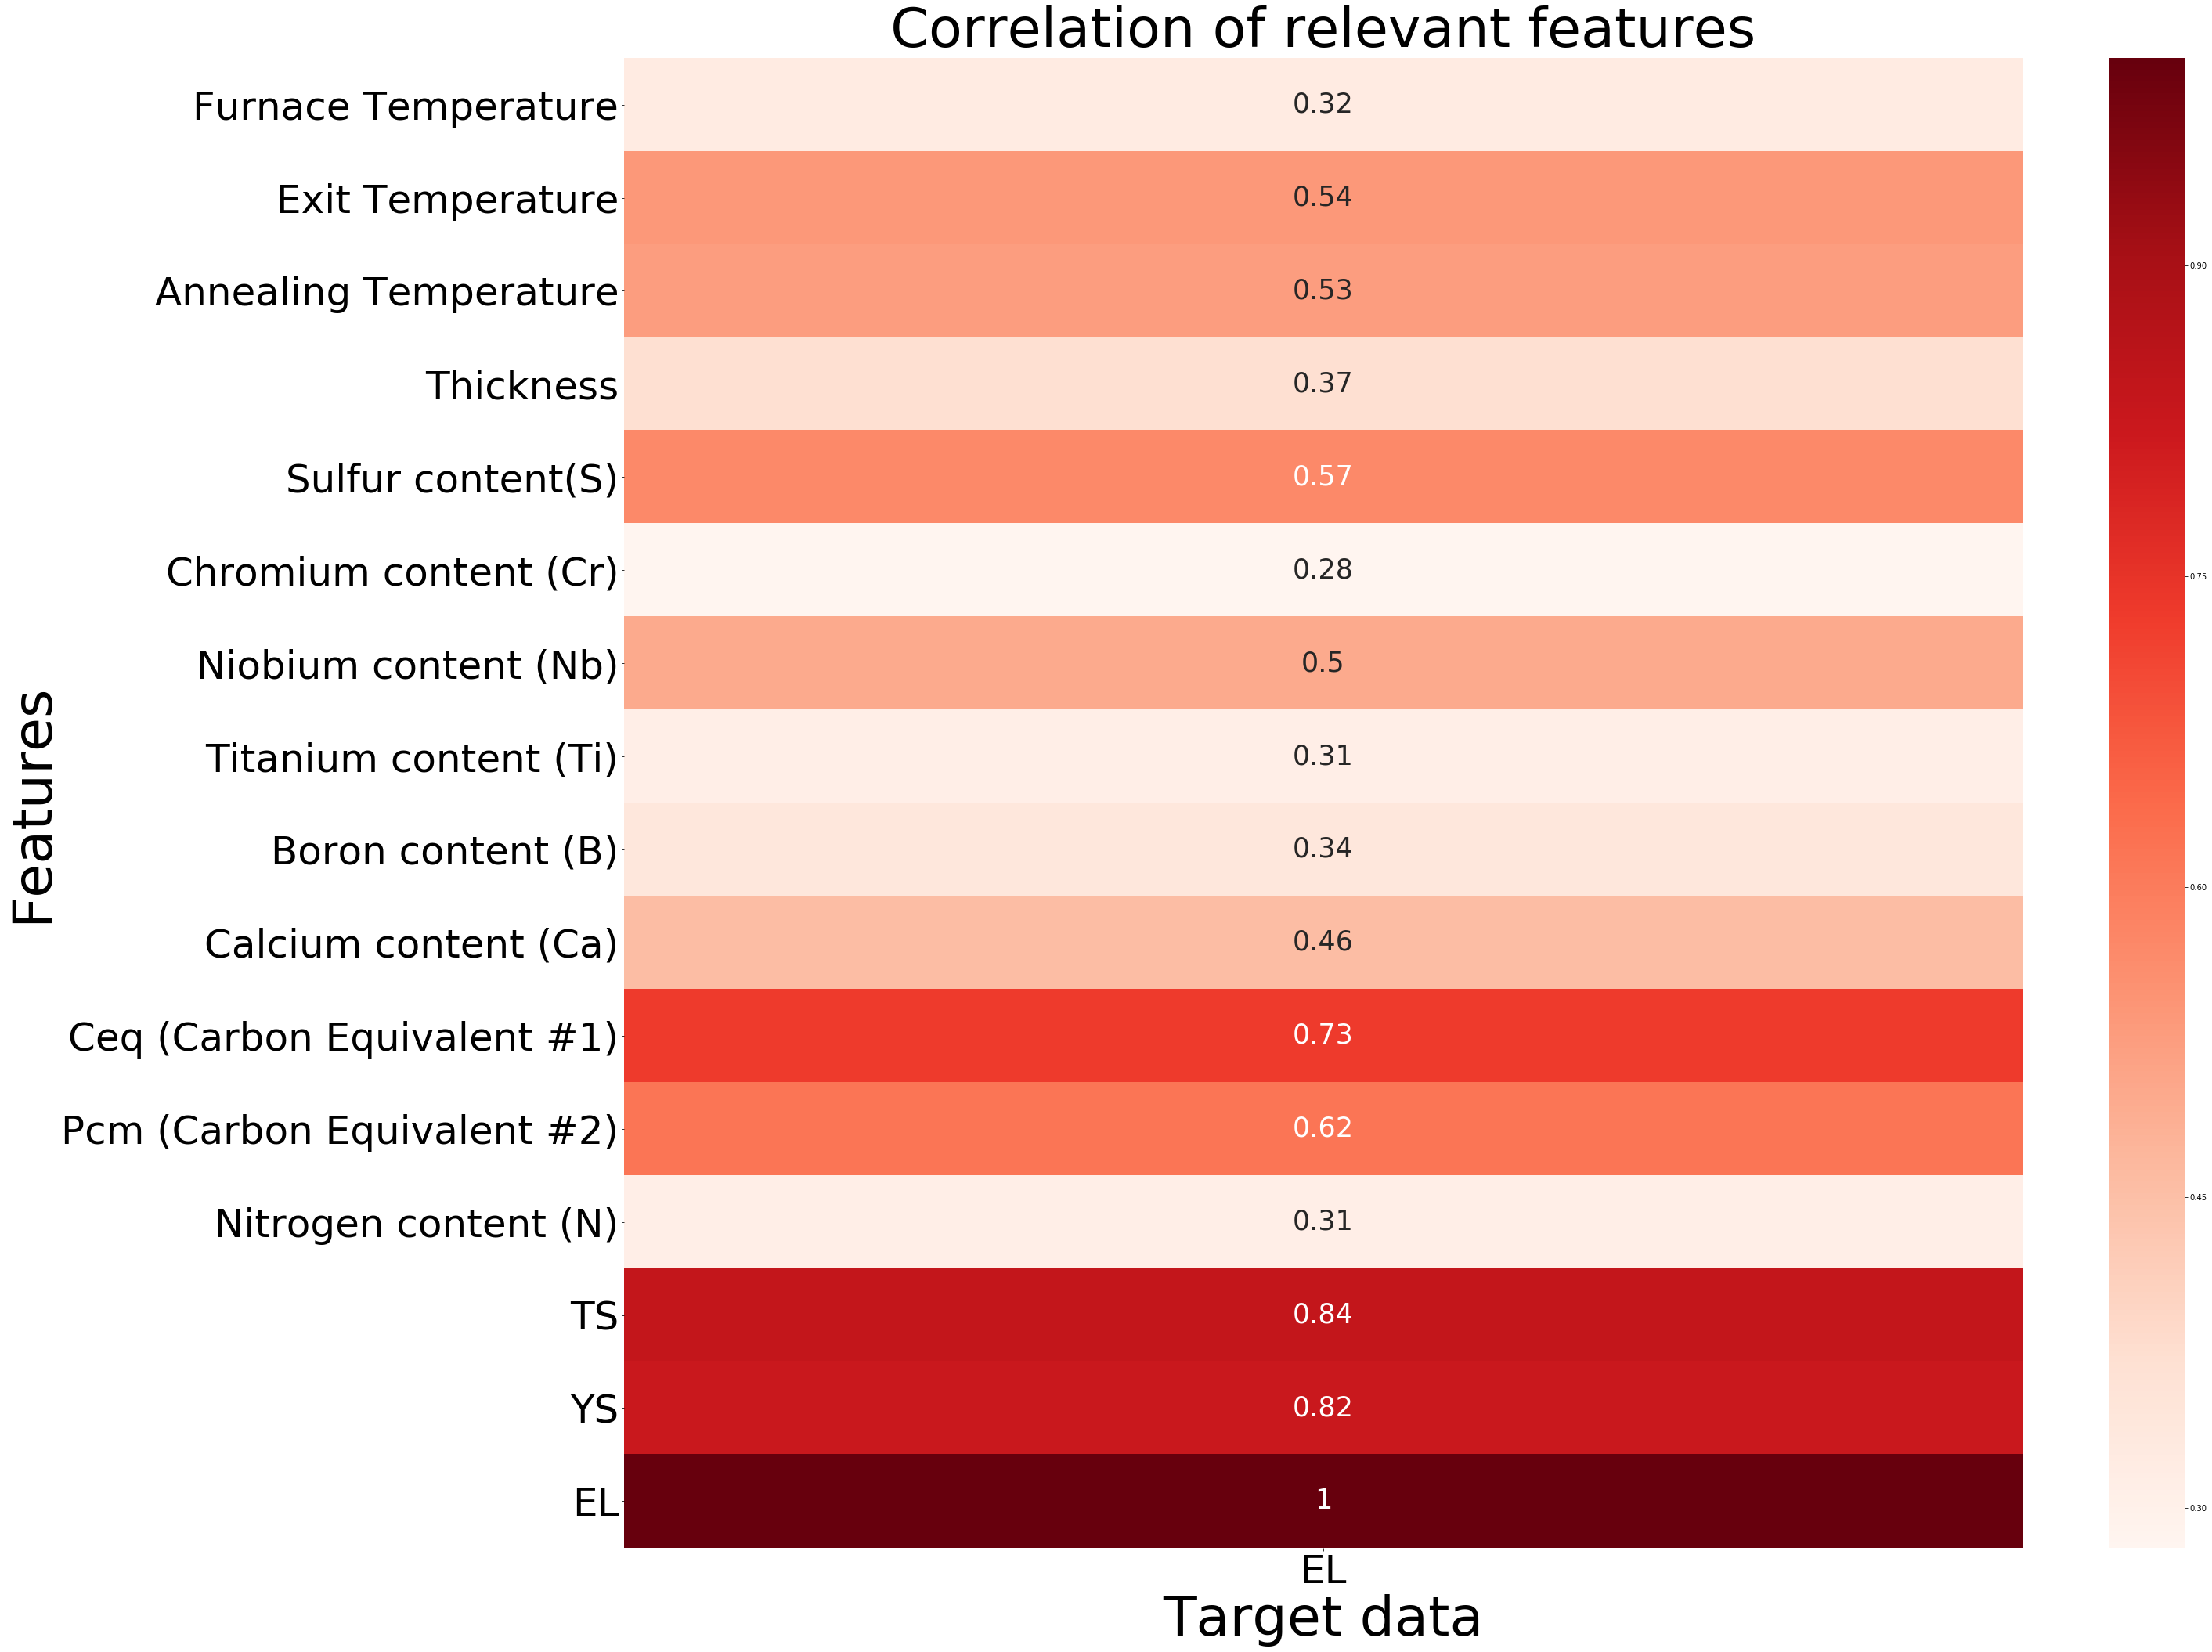

In [16]:
# plotting the heat map of relevant features

plt.figure(figsize=(40,35))
sns.heatmap(relevant_features_EL, annot=True, cmap=plt.cm.Reds, annot_kws={"size": 35})
plt.title(' Correlation of relevant features ' , size = 70)
plt.xlabel('Target data',  size = 70)
plt.ylabel('Features',  size = 70)
plt.xticks(size=50)
plt.yticks(size=50)
plt.show()

### RELATION BETWEEN TENSILE STRENGTH AND ITS HIGHLY CORRELATED FEATURE ceq PLOT:  

- The plot shows that ceq is highly positively correlated with the tensile strength of the steel as it has positive slope.

Text(0.5, 1.0, 'Relation between tensile strength and its highly correlated feature')

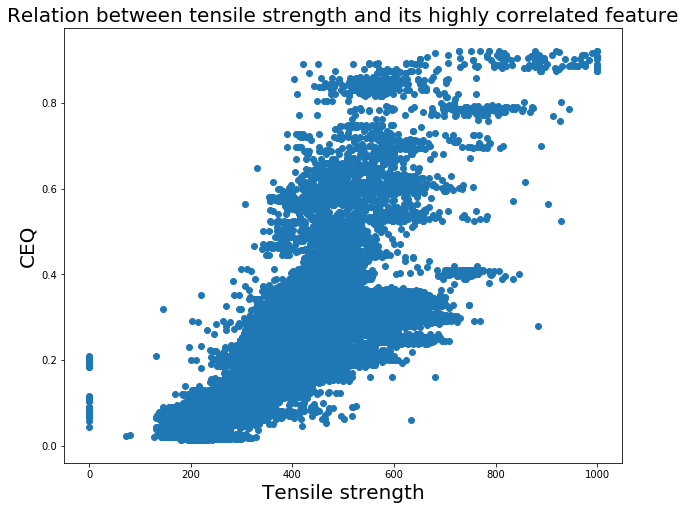

In [17]:
plt.figure(figsize=[10,8])
plt.scatter(df.TS,df["Ceq (Carbon Equivalent #1)"])
plt.xlabel("Tensile strength", size=20)
plt.ylabel("CEQ", size=20)
plt.title("Relation between tensile strength and its highly correlated feature", size=20)

### RELATION BETWEEN YIELD STRENGTH AND ITS HIGHLY CORRELATED FEATURE ceq PLOT:  

- The plot shows that ceq is highly positively correlated with the yield strength of the steel as it has positive slope.

Text(0.5, 1.0, 'Relation between yield strength and its highly correlated feature')

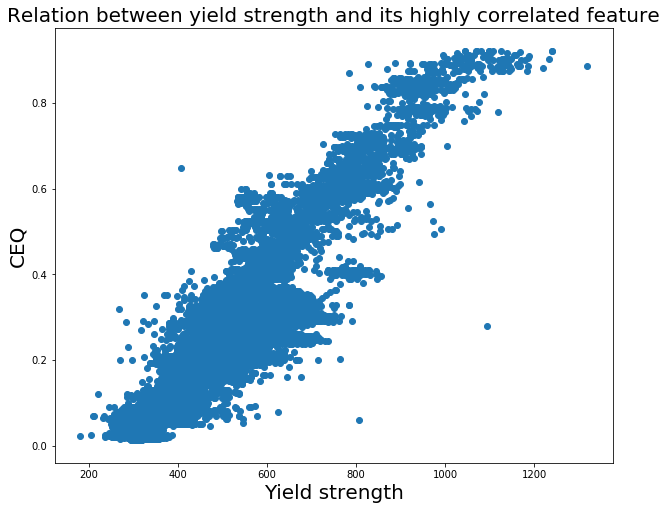

In [18]:

plt.figure(figsize=[10,8])
plt.scatter(df.YS,df["Ceq (Carbon Equivalent #1)"])
plt.xlabel("Yield strength", size=20)
plt.ylabel("CEQ", size=20)
plt.title("Relation between yield strength and its highly correlated feature", size=20)

### RELATION BETWEEN ELONGATION AND ITS HIGHLY CORRELATED FEATURE ceq PLOT: 

- The plot shows that ceq is somewhat correlated with the elongation property of the steel as it has negative slope.

Text(0.5, 1.0, 'Relation between elongation and its highly correlated feature')

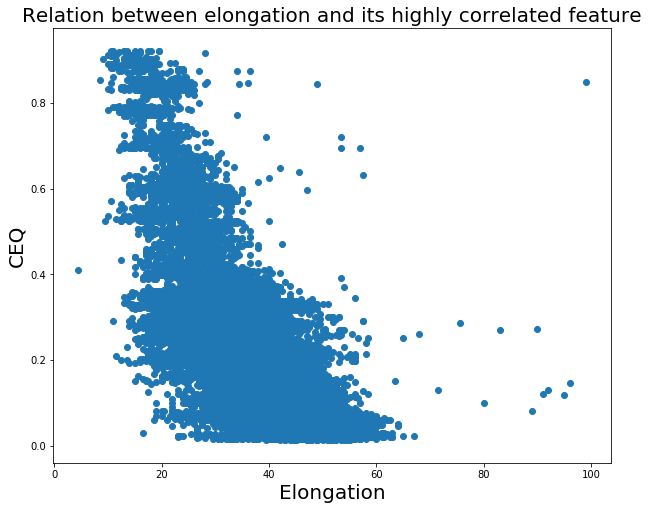

In [19]:
plt.figure(figsize=[10,8])
plt.scatter(df.EL,df["Ceq (Carbon Equivalent #1)"])
#plt.scatter(df.YS,df.TS)
plt.xlabel("Elongation", size=20)
plt.ylabel("CEQ", size=20)
plt.title("Relation between elongation and its highly correlated feature", size=20)

## DATA PREPROCESSING

#### SEPARATING FEATURES AND TARGET VARIABLES

In [20]:
X = df.iloc[: , 0:27] # FEATURE SET
y1 = df.TS            # TENSILE STRENGTH TARGET 
y2 = df.YS            # YIELD STRENGTH TARGET
y3 = df.EL            # ELONGATION TARGET

In [21]:
# RESHAPING TARGET VARIABLES
y1.values.reshape(-1,1).shape
y2.values.reshape(-1,1).shape
y2.values.reshape(-1,1).shape

(63162, 1)

#### STANDARDIZING THE FEATURE SET

In [22]:
xMean =np.mean(X, axis=0)
xstd = np.std(X, axis=0)

In [23]:
X_Norm = (X - xMean)/xstd

#### SPLITTING THE DATA INTO 70% TRAIN SET AND 30% TEST SET

In [24]:
X_train, X_test, y1_train, y1_test =  train_test_split(X_Norm, y1, test_size=0.3, random_state=42)
X_train, X_test, y2_train, y2_test =  train_test_split(X_Norm, y2, test_size=0.3, random_state=42)
X_train, X_test, y3_train, y3_test =  train_test_split(X_Norm, y3, test_size=0.3, random_state=42)

## TARGET VARIABLE : TENSILE STRENGTH (TS)

### MODEL(1): ORDINARY LEAST SQUARES 

In [25]:
X1 = sm.add_constant(X_Norm ) #model needs intercept so adding column with 1s

# splitting data into train and test set after having intercept
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y1, test_size=0.3, random_state=42) 

In [26]:
X1.head()

,const,Furnace Temperature,Exit Temperature,Annealing Temperature,Thickness,Width,Sulfur content(S),Copper content (Cu),Nickel content (Ni),Chromium content (Cr),...,Arsenic content (As),Zirconium content (Zr),Calcium content (Ca),Lead content (Pb),Ceq (Carbon Equivalent #1),Pcm (Carbon Equivalent #2),Antimony content (Sb),Nitrogen content (N),Oxygen content (O),Tungsten content (W)
0,1.0,1.457154,0.330055,-0.159888,0.879617,1.852983,-0.909066,3.773168,5.234432,2.496915,...,-0.287119,-0.215821,-0.106116,-0.479752,0.531556,0.261615,-0.17196,-1.260965,-0.292,-0.007958
1,1.0,0.646964,0.252004,-0.062447,0.879617,1.852983,-0.578019,3.808156,5.791982,2.590585,...,-0.175166,-0.197919,-0.248480,-0.479752,0.588173,0.299128,-0.17196,-1.260965,-0.292,-0.007958
2,1.0,0.177907,0.369081,-0.101423,1.710641,1.852983,-0.578019,3.808156,5.791982,2.590585,...,-0.175166,-0.197919,-0.248480,-0.479752,0.588173,0.299128,-0.17196,-1.260965,-0.292,-0.007958
3,1.0,0.049983,-0.255329,-0.198865,2.541665,1.852983,-0.578019,3.808156,5.791982,2.590585,...,-0.175166,-0.197919,-0.248480,-0.479752,0.588173,0.299128,-0.17196,-1.260965,-0.292,-0.007958
4,1.0,0.263190,-0.255329,0.112947,3.372689,1.852983,-0.578019,3.719927,5.625616,2.632945,...,0.048739,-0.180017,-0.248480,-0.479752,0.736419,0.524208,-0.17196,-1.260965,-0.292,-0.007958


In [27]:
ols_ts = sm.OLS(y1_train, X1_train) # fitting model on train data
results = ols_ts.fit()
print(results.summary()) # summary of the model 

                            OLS Regression Results                            
Dep. Variable:                     TS   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:53:29   Log-Likelihood:            -2.2720e+05
No. Observations:               44213   AIC:                         4.545e+05
Df Residuals:                   44185   BIC:                         4.547e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [28]:
train_pred_ols_ts = results.predict(X1_train) # predicting target on train data
test_pred_ols_ts = results.predict(X1_test)   # predicting target on test data

In [29]:
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_ols_ts - y1_train)))/len(y1_train)
MAE_test = np.sum(np.absolute((test_pred_ols_ts - y1_test)))/len(y1_test)

# Mean Squared Error on train and test data
RMSE_train = np.sqrt(np.mean((train_pred_ols_ts - y1_train)**2))
RMSE_test = np.sqrt(np.mean((test_pred_ols_ts - y1_test)**2))

# R2 Square score of train and test data
R2_train = 1 - ((y1_train-train_pred_ols_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
R2_test = 1 - ((y1_test-test_pred_ols_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()







print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

print("RMSE on train data:", RMSE_train)
print("RMSE on test data:", RMSE_test)

print("R2 on train data:", R2_train)
print("R2 on test data:", R2_test)

MAE on train data: 30.135420920283806
MAE on test data: 30.765161378091776
RMSE on train data: 41.25968597749638
RMSE on test data: 49.614232928995285
R2 on train data: 0.8879699311831246
R2 on test data: 0.8365898332328101


### MODEL(2): SUPPORT VECTOR MACHINES

In [30]:
svm_ts1 = SVR(kernel='rbf', C=100, gamma='auto') # svm regressor with radial basis function kernel 
svm_ts1.fit(X_train,y1_train) # fitting train data 

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
train_pred_svm_ts = svm_ts1.predict(X_train) # predicting target on train data
test_pred_svm_ts = svm_ts1.predict(X_test)   # predicting target on test data

In [32]:
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_svm_ts - y1_train)))/len(y1_train)
MAE_test = np.sum(np.absolute((test_pred_svm_ts - y1_test)))/len(y1_test)

# Mean Squared Error on train and test data
RMSE_train = np.sqrt(np.mean((train_pred_svm_ts - y1_train)**2))
RMSE_test = np.sqrt(np.mean((test_pred_svm_ts - y1_test)**2))

# R2 Square score of train and test data
R2_train = 1 - ((y1_train-train_pred_svm_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
R2_test = 1 - ((y1_test-test_pred_svm_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

print("RMSE on train data:", RMSE_train)
print("RMSE on test data:", RMSE_test)

print("R2 on train data:", R2_train)
print("R2 on test data:", R2_test)

MAE on train data: 19.585992890756497
MAE on test data: 20.991411072739336
RMSE on train data: 29.74422472541376
RMSE on test data: 31.588656128686324
R2 on train data: 0.9417778721668665
R2 on test data: 0.9337587054778572


### MODEL(3): DECISION TREE REGRESSOR

- We are getting least error with max_depth=10 parameter.

In [36]:
# model implementation by tuning max_depth hyperparameter

depth = [1,5,10,20,50,100]
for i in depth:
    dt_ts = DecisionTreeRegressor(random_state = 42, max_depth=i)
    dt_ts.fit(X_train, y1_train)
    train_pred_dt_ts = dt_ts.predict(X_train)  # predicting target on train data
    test_pred_dt_ts = dt_ts.predict(X_test)    # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_dt_ts - y1_train)))/len(y1_train)
    MAE_test = np.sum(np.absolute((test_pred_dt_ts - y1_test)))/len(y1_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_dt_ts - y1_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_dt_ts - y1_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y1_train-train_pred_dt_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
    R2_test = 1 - ((y1_test-test_pred_dt_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 54.74372908638101
MAE on test data: 54.49869168707046
RMSE on train data: 73.58885734801603
RMSE on test data: 73.3706335932942
R2 on train data: 0.6436252832768627
R2 on test data: 0.6426357950771568


Max_depth: 5
MAE on train data: 29.262264049566554
MAE on test data: 29.962832053595257
RMSE on train data: 41.484946502715516
RMSE on test data: 42.60729881188364
R2 on train data: 0.8867433178251812
R2 on test data: 0.8794868288063395


Max_depth: 10
MAE on train data: 20.978056482954845
MAE on test data: 23.59443322274736
RMSE on train data: 29.555683018912156
RMSE on test data: 34.71798755096411
R2 on train data: 0.9425136457947288
R2 on test data: 0.91998422851656


Max_depth: 20
MAE on train data: 7.440233690912309
MAE on test data: 25.488263652760313
RMSE on train data: 13.580260264002769
RMSE on test data: 38.598133144028594
R2 on train data: 0.9878633465123091
R2 on test data: 0.9010993580646407


Max_depth: 50
MAE on train data: 0.02302490217809

### MODEL(4): RANDOM FOREST REGRESSOR

- We are getting least error with max_depth=20 parameter.

In [37]:
# tuning of max_depth parameter
depth = [1,5,10,20,50,100]
for i in depth:
    rf_ts = RandomForestRegressor(random_state = 42, max_depth=i)
    rf_ts.fit(X_train, y1_train)
    train_pred_rf_ts = rf_ts.predict(X_train)
    test_pred_rf_ts = rf_ts.predict(X_test)
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_rf_ts - y1_train)))/len(y1_train)
    MAE_test = np.sum(np.absolute((test_pred_rf_ts - y1_test)))/len(y1_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_rf_ts - y1_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_rf_ts - y1_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y1_train-train_pred_rf_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
    R2_test = 1 - ((y1_test-test_pred_rf_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 54.63209286342098
MAE on test data: 54.37142803045146
RMSE on train data: 73.47176433788269
RMSE on test data: 73.2259779837916
R2 on train data: 0.6447584925882751
R2 on test data: 0.6440435456813758


Max_depth: 5
MAE on train data: 28.56057053012173
MAE on test data: 29.276791410631613
RMSE on train data: 40.31470221869557
RMSE on test data: 41.593344512386935
R2 on train data: 0.8930428853190515
R2 on test data: 0.8851544432905398


Max_depth: 10
MAE on train data: 20.026375557314772
MAE on test data: 22.037867895890525
RMSE on train data: 27.96420169982373
RMSE on test data: 32.20202439547474
R2 on train data: 0.9485378865289392
R2 on test data: 0.9311612683171221


Max_depth: 20
MAE on train data: 10.475455625958949
MAE on test data: 20.15303320567584
RMSE on train data: 14.685380178214777
RMSE on test data: 30.18641616137817
R2 on train data: 0.9858076878565447
R2 on test data: 0.9395091592224913


Max_depth: 50
MAE on train data: 7.37415934253643

### MODEL(5): XGBOOST REGRESSOR

- We are getting least error with max_depth=5 parameter.

In [38]:
# tuning of max_depth hyperparameter
depth = [1,5,10,20,50,100]
for i in depth:

    xgb_ts = xgb.XGBRegressor(random_state = 42, max_depth=i)
    xgb_ts.fit(X_train, y1_train)
    train_pred_xgb_ts = xgb_ts.predict(X_train)  # predicting target on train data
    test_pred_xgb_ts = xgb_ts.predict(X_test)    # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_xgb_ts - y1_train)))/len(y1_train)
    MAE_test = np.sum(np.absolute((test_pred_xgb_ts - y1_test)))/len(y1_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_xgb_ts - y1_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_xgb_ts - y1_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y1_train-train_pred_xgb_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
    R2_test = 1 - ((y1_test-test_pred_xgb_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 26.486981398787567
MAE on test data: 26.837293503787613
RMSE on train data: 36.790076541691725
RMSE on test data: 37.846203063012105
R2 on train data: 0.910927395996199
R2 on test data: 0.9049151903987434


Max_depth: 5
MAE on train data: 18.630334159011223
MAE on test data: 21.03307494199196
RMSE on train data: 26.23485694626249
RMSE on test data: 30.944238948365374
R2 on train data: 0.9547060530593694
R2 on test data: 0.9364338186304318


Max_depth: 10
MAE on train data: 8.946410764483216
MAE on test data: 21.206368264311994
RMSE on train data: 12.464616493865893
RMSE on test data: 31.547396401442388
R2 on train data: 0.989775534640449
R2 on test data: 0.9339316354566661


Max_depth: 20
MAE on train data: 0.05190994655449923
MAE on test data: 21.83693241111785
RMSE on train data: 0.8612401095972322
RMSE on test data: 32.35101407485289
R2 on train data: 0.999951187476392
R2 on test data: 0.9305227999495564


Max_depth: 50
MAE on train data: 0.0234108508

- We are getting least error with n_estimators=500 parameter.

In [87]:
# tuning no. of estimators
estimator = [10,50,100,500,1000]

for i in estimator:

    xgb_ts = xgb.XGBRegressor(random_state = 42, max_depth=5, gamma = 0.1,  n_estimators= i )
    xgb_ts.fit(X_train, y1_train)
    train_pred_xgb_ts = xgb_ts.predict(X_train)  # predicting target on train data
    test_pred_xgb_ts = xgb_ts.predict(X_test)    # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_xgb_ts - y1_train)))/len(y1_train)
    MAE_test = np.sum(np.absolute((test_pred_xgb_ts - y1_test)))/len(y1_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_xgb_ts - y1_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_xgb_ts - y1_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y1_train-train_pred_xgb_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
    R2_test = 1 - ((y1_test-test_pred_xgb_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


    print("# of estimators:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    





# of estimators: 10
MAE on train data: 24.530439030546308
MAE on test data: 25.179101411595095
RMSE on train data: 34.090088735377634
RMSE on test data: 35.48946459231767
R2 on train data: 0.9235215584358138
R2 on test data: 0.9163886172747463


# of estimators: 50
MAE on train data: 19.82839000105623
MAE on test data: 21.371360364504568
RMSE on train data: 28.12563216866291
RMSE on test data: 31.244622404222614
R2 on train data: 0.9479420152842197
R2 on test data: 0.9351937231481381


# of estimators: 100
MAE on train data: 18.630334159011223
MAE on test data: 21.03307494199196
RMSE on train data: 26.23485694626249
RMSE on test data: 30.944238948365374
R2 on train data: 0.9547060530593694
R2 on test data: 0.9364338186304318


# of estimators: 500
MAE on train data: 13.877095625379136
MAE on test data: 20.829800138876642
RMSE on train data: 19.202981934950635
RMSE on test data: 30.8995845950849
R2 on train data: 0.9757327752203635
R2 on test data: 0.9366171457213579


# of estimators: 

### MODEL(6): MLP REGRESSOR

- Implementing MLP regressor with 2 hidden layer having 100 hidden neurons in each layer. 
- We are getting least error with max_iter=500 parameter.

In [43]:
iterations = [10,50,100,500,1000,5000,10000]

for i in iterations:

    mlp_ts = MLPRegressor(hidden_layer_sizes=(100,100 ), activation='relu',random_state=1, max_iter=i, alpha=1 )
    mlp_ts.fit(X_train, y1_train)
    train_pred_mlp_ts = mlp_ts.predict(X_train)  # predicting target on train data
    test_pred_mlp_ts = mlp_ts.predict(X_test)    # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_mlp_ts - y1_train)))/len(y1_train)
    MAE_test = np.sum(np.absolute((test_pred_mlp_ts - y1_test)))/len(y1_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_mlp_ts - y1_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_mlp_ts - y1_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y1_train-train_pred_mlp_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
    R2_test = 1 - ((y1_test-test_pred_mlp_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


    print("max_iteration:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 10
MAE on train data: 26.098318196793297
MAE on test data: 27.037184823736617
RMSE on train data: 36.324887242526344
RMSE on test data: 54.11442055326954
R2 on train data: 0.9131656983499596
R2 on test data: 0.8056016673585829




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 50
MAE on train data: 21.23049730123767
MAE on test data: 22.105232039558853
RMSE on train data: 30.57267451350072
RMSE on test data: 35.79309197192304
R2 on train data: 0.9384894469895037
R2 on test data: 0.9149518358336018




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 100
MAE on train data: 20.683402620325065
MAE on test data: 21.783538374342953
RMSE on train data: 29.784116546869186
RMSE on test data: 34.87289552322872
R2 on train data: 0.9416215968406698
R2 on test data: 0.9192685917787693


max_iteration: 500
MAE on train data: 20.333866779015263
MAE on test data: 21.756707852808805
RMSE on train data: 29.239231229224515
RMSE on test data: 33.909235961054165
R2 on train data: 0.9437380648608569
R2 on test data: 0.9236687244958365


max_iteration: 1000
MAE on train data: 20.333866779015263
MAE on test data: 21.756707852808805
RMSE on train data: 29.239231229224515
RMSE on test data: 33.909235961054165
R2 on train data: 0.9437380648608569
R2 on test data: 0.9236687244958365


max_iteration: 5000
MAE on train data: 20.333866779015263
MAE on test data: 21.756707852808805
RMSE on train data: 29.239231229224515
RMSE on test data: 33.909235961054165
R2 on train data: 0.9437380648608569
R2 on test data: 0.9236687244958365


max_iteration: 

- We are getting least error with alpha=0.001 parameter.

In [44]:
alpha = [0.001, 0.01, 0.1, 0.5,1]

for i in alpha:

    mlp_ts = MLPRegressor(hidden_layer_sizes=(100,100), activation='relu',random_state=1, max_iter=500, alpha=i )
    mlp_ts.fit(X_train, y1_train)
    train_pred_mlp_ts = mlp_ts.predict(X_train)    # predicting target on train data
    test_pred_mlp_ts = mlp_ts.predict(X_test)      # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_mlp_ts - y1_train)))/len(y1_train)
    MAE_test = np.sum(np.absolute((test_pred_mlp_ts - y1_test)))/len(y1_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_mlp_ts - y1_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_mlp_ts - y1_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y1_train-train_pred_mlp_ts)**2).sum()/((y1_train-y1_train.mean())**2).sum()
    R2_test = 1 - ((y1_test-test_pred_mlp_ts)**2).sum()/((y1_test-y1_test.mean())**2).sum()


    print("alpha value :", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



alpha value : 0.001
MAE on train data: 20.355535272185563
MAE on test data: 21.68523369429183
RMSE on train data: 29.292597711110428
RMSE on test data: 32.28058169010952
R2 on train data: 0.9435325025769257
R2 on test data: 0.9308249925200438


alpha value : 0.01
MAE on train data: 20.380030901048308
MAE on test data: 21.773940606883123
RMSE on train data: 29.30430539433354
RMSE on test data: 34.04324050105951
R2 on train data: 0.9434873556292981
R2 on test data: 0.923064231446159


alpha value : 0.1
MAE on train data: 19.97133610673336
MAE on test data: 21.57669836473573
RMSE on train data: 28.751886072549077
RMSE on test data: 33.20543457042489
R2 on train data: 0.9455979276128934
R2 on test data: 0.9268044215203788


alpha value : 0.5
MAE on train data: 20.298886775323435
MAE on test data: 21.76647574613005
RMSE on train data: 29.254439071325592
RMSE on test data: 36.33179416550363
R2 on train data: 0.9436795239825806
R2 on test data: 0.9123725445217443


alpha value : 1
MAE on trai

## COMPARISION PLOT OF TEST ERRORS OF DIFFERENT MODELS FOR TS:

In [89]:
models = ['OLS', 'SVM','DL','RF','XGboost','MLP']
mae = [30.76,20.99,23.59,20.15,20.82,21.68]
rmse = [49.61,31.58,34.71,30.18,30.89,32.28]
r2 = [0.83,0.93,0.91,0.93,0.93,0.93]

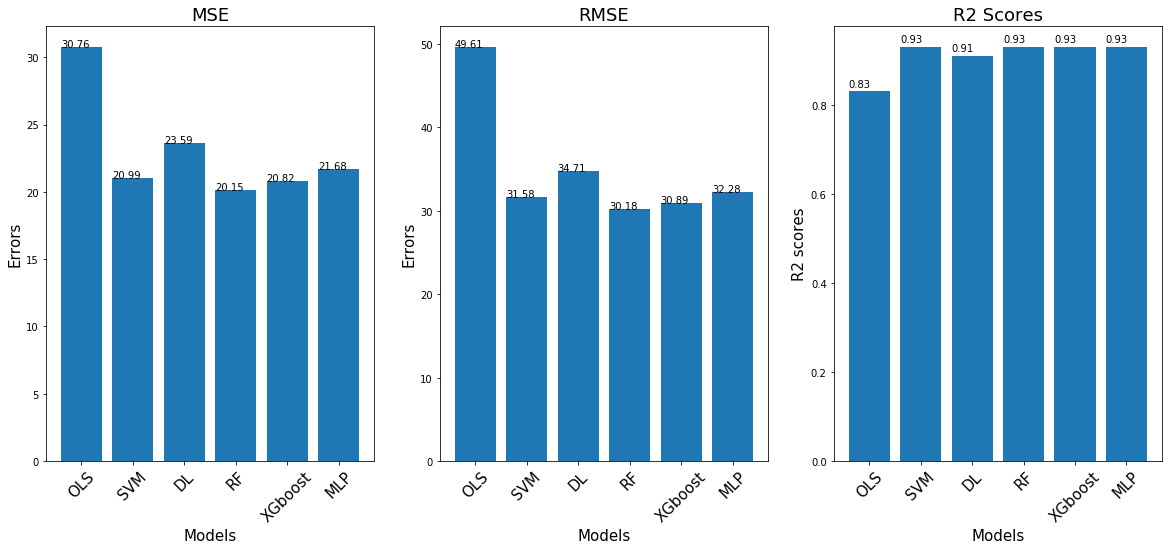

In [106]:
plt.figure(figsize=(20,8))
plt.subplot(131)
bar = plt.bar(models,mae)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("Errors", size=15)
plt.title("MSE" , size =18)
plt.xticks(size=15, rotation =45)

plt.subplot(132)
bar = plt.bar(models,rmse)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("Errors", size=15)
plt.title("RMSE" , size =18)
plt.xticks(size=15, rotation =45)


plt.subplot(133)
bar = plt.bar(models,r2)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("R2 scores", size=15)
plt.title("R2 Scores" , size =18)
plt.xticks(size=15, rotation =45)

plt.show()

#### BEST MODEL TO PREDICT TENSILE STRENGTH PROPERTY

 We are getting least errors with random forest model having max_depth=20. 

In [45]:

rf_ts = RandomForestRegressor(random_state = 42, max_depth=20)
rf_ts.fit(X_train, y1_train)
train_pred_rf_ts = rf_ts.predict(X_train) 
test_pred_rf_ts = rf_ts.predict(X_test)
    
MAE_train = np.sum(np.absolute((train_pred_rf_ts - y1_train)))/len(y1_train)
MAE_test = np.sum(np.absolute((test_pred_rf_ts - y1_test)))/len(y1_test)

print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

MAE on train data: 10.475455625958949
MAE on test data: 20.15303320567584


### PLOTTING ORIGINAL VALUES VS PREDICTED VALUES FOR TENSILE STRENGTH

Text(0.5, 1.0, 'Visualization of actual vs predicted values for tensile strength property')

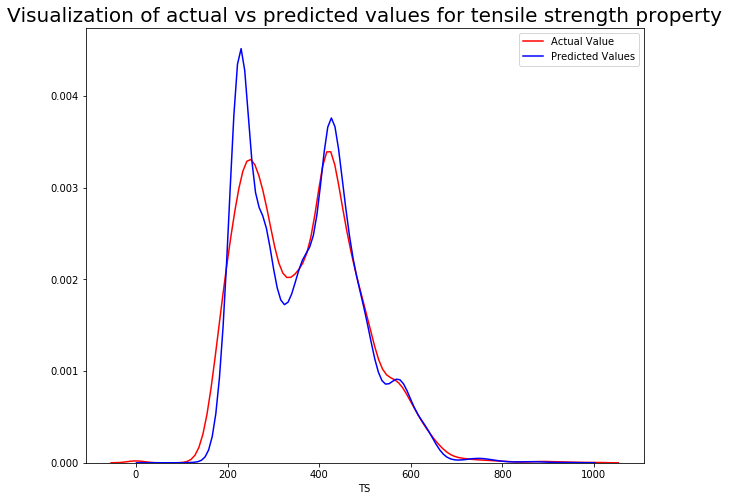

In [46]:

plt.figure(figsize=[10,8])
ax1 = sns.distplot(y1_test, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_rf_ts, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title("Visualization of actual vs predicted values for tensile strength property", size=20)

## TARGET VARIABLE : YIELD STRENGTH (YS)

### MODEL(1): ORDINARY LEAST SQUARES

In [47]:
X1 = sm.add_constant(X_Norm ) #model needs intercept so adding column with 1s

# splitting data into train and test set after having intercept in feature set
X1_train, X1_test, y2_train, y2_test =  train_test_split(X1, y2, test_size=0.3, random_state=42)

In [48]:
ols_ys = sm.OLS(y2_train, X1_train) # fitting training data into the model
results = ols_ys.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     YS   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 2.605e+04
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        20:52:05   Log-Likelihood:            -2.1311e+05
No. Observations:               44213   AIC:                         4.263e+05
Df Residuals:                   44185   BIC:                         4.265e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [49]:
train_pred_ols_ys = results.predict(X1_train) # predicting target on train data
test_pred_ols_ys = results.predict(X1_test)   # predicting target on test data

In [50]:
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_ols_ys - y2_train)))/len(y2_train)
MAE_test = np.sum(np.absolute((test_pred_ols_ys - y2_test)))/len(y2_test)

# Mean Squared Error on train and test data
RMSE_train = np.sqrt(np.mean((train_pred_ols_ys - y2_train)**2))
RMSE_test = np.sqrt(np.mean((test_pred_ols_ys - y2_test)**2))

# R2 Square score of train and test data
R2_train = 1 - ((y2_train-train_pred_ols_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
R2_test = 1 - ((y2_test-test_pred_ols_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()







print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

print("RMSE on train data:", RMSE_train)
print("RMSE on test data:", RMSE_test)

print("R2 on train data:", R2_train)
print("R2 on test data:", R2_test)

MAE on train data: 21.14548083932561
MAE on test data: 21.467737583420718
RMSE on train data: 30.001159039280708
RMSE on test data: 33.4559076519563
R2 on train data: 0.9408881795553132
R2 on test data: 0.9266319180677195


### MODEL(2): SUPPORT VECTOR MACHINES

In [51]:
svm_ys1 = SVR(kernel='rbf', C=100, gamma='auto')  # svm regressor with radial basis function kernel
svm_ys1.fit(X_train,y2_train)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
train_pred_svm_ys = svm_ys1.predict(X_train) # predicting target on train data
test_pred_svm_ys = svm_ys1.predict(X_test)   # predicting target on test data

In [53]:
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_svm_ys - y2_train)))/len(y2_train)
MAE_test = np.sum(np.absolute((test_pred_svm_ys - y2_test)))/len(y2_test)

# Mean Squared Error on train and test data
RMSE_train = np.sqrt(np.mean((train_pred_svm_ys - y2_train)**2))
RMSE_test = np.sqrt(np.mean((test_pred_svm_ys - y2_test)**2))

# R2 Square score of train and test data
R2_train = 1 - ((y2_train-train_pred_svm_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
R2_test = 1 - ((y2_test-test_pred_svm_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()







print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

print("RMSE on train data:", RMSE_train)
print("RMSE on test data:", RMSE_test)

print("R2 on train data:", R2_train)
print("R2 on test data:", R2_test)

MAE on train data: 14.027756965984043
MAE on test data: 15.14842583363496
RMSE on train data: 22.55965844147365
RMSE on test data: 23.636137079452844
R2 on train data: 0.9665756240104566
R2 on test data: 0.9633803210796609


### MODEL(3): DECISION TREE REGRESSOR

- We are getting least error with max_depth=10 parameter.

In [58]:
# model implementation by tuning max_depth hyperparameter

depth = [1,5,10,20,50,100]
for i in depth:
    dt_ys = DecisionTreeRegressor(random_state = 42, max_depth=i)
    dt_ys.fit(X_train, y2_train)
    train_pred_dt_ys = dt_ys.predict(X_train)     # predicting target on train data
    test_pred_dt_ys = dt_ys.predict(X_test)       # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_dt_ys - y2_train)))/len(y2_train)
    MAE_test = np.sum(np.absolute((test_pred_dt_ys - y2_test)))/len(y2_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_dt_ys - y2_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_dt_ys - y2_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y2_train-train_pred_dt_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
    R2_test = 1 - ((y2_test-test_pred_dt_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 52.79882926248506
MAE on test data: 52.72271133868018
RMSE on train data: 78.6900366990867
RMSE on test data: 78.70397906458706
R2 on train data: 0.5933340939596685
R2 on test data: 0.5939730026647552


Max_depth: 5
MAE on train data: 22.209305239987422
MAE on test data: 22.741621540680487
RMSE on train data: 32.936143822187674
RMSE on test data: 33.48319136484882
R2 on train data: 0.928756742494414
R2 on test data: 0.9265122040888673


Max_depth: 10
MAE on train data: 15.712741264630257
MAE on test data: 17.524123008625722
RMSE on train data: 23.01189963105133
RMSE on test data: 26.358710737586815
R2 on train data: 0.9652221115446852
R2 on test data: 0.9544582347523778


Max_depth: 20
MAE on train data: 6.150028870293803
MAE on test data: 18.506344890294695
RMSE on train data: 11.236800982079211
RMSE on test data: 29.077756810639777
R2 on train data: 0.9917075350222752
R2 on test data: 0.9445778547605015


Max_depth: 50
MAE on train data: 0.013208784746

### MODEL(4): RANDOM FOREST REGRESSOR

- We are getting least error with max_depth=20 parameter.

In [59]:
# tuning of max_depth parameter

depth = [1,5,10,20,50,100]
for i in depth:
    rf_ys = RandomForestRegressor(random_state = 42, max_depth=i)
    rf_ys.fit(X_train, y2_train)
    train_pred_rf_ys = rf_ys.predict(X_train)   # predicting target on train data
    test_pred_rf_ys = rf_ys.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_rf_ys - y2_train)))/len(y2_train)
    MAE_test = np.sum(np.absolute((test_pred_rf_ys - y2_test)))/len(y2_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_rf_ys - y2_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_rf_ys - y2_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y2_train-train_pred_rf_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
    R2_test = 1 - ((y2_test-test_pred_rf_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 52.627907844949355
MAE on test data: 52.55197110929548
RMSE on train data: 78.49787641312152
RMSE on test data: 78.51602150315492
R2 on train data: 0.5953178170679166
R2 on test data: 0.5959100004644085


Max_depth: 5
MAE on train data: 21.76513688564363
MAE on test data: 22.27132835364261
RMSE on train data: 32.039996721751216
RMSE on test data: 32.63706481983552
R2 on train data: 0.9325808622436937
R2 on test data: 0.9301793769311851


Max_depth: 10
MAE on train data: 14.927967396977966
MAE on test data: 16.34703416823669
RMSE on train data: 21.661979268084725
RMSE on test data: 24.45646741022291
R2 on train data: 0.9691827033000487
R2 on test data: 0.9607943206145032


Max_depth: 20
MAE on train data: 7.869810057665519
MAE on test data: 14.692315312496863
RMSE on train data: 11.309729700910998
RMSE on test data: 22.683241234097483
R2 on train data: 0.9915995467539397
R2 on test data: 0.9662734626612671


Max_depth: 50
MAE on train data: 5.339784361975

### MODEL(5): XGBOOST REGRESSOR

- We are getting least error with max_depth=10 parameter.

In [60]:
# tuning of max_depth hyperparameter

depth = [1,5,10,20,50,100]
for i in depth:

    xgb_ys = xgb.XGBRegressor(random_state = 42, max_depth=i)
    xgb_ys.fit(X_train, y2_train)
    train_pred_xgb_ys = xgb_ys.predict(X_train)   # predicting target on train data
    test_pred_xgb_ys = xgb_ys.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_xgb_ys - y2_train)))/len(y2_train)
    MAE_test = np.sum(np.absolute((test_pred_xgb_ys - y2_test)))/len(y2_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_xgb_ys - y2_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_xgb_ys - y2_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y2_train-train_pred_xgb_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
    R2_test = 1 - ((y2_test-test_pred_xgb_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 19.767771283123125
MAE on test data: 19.993305185160867
RMSE on train data: 28.278084138492527
RMSE on test data: 28.64592818552059
R2 on train data: 0.9474832027544012
R2 on test data: 0.9462117605348133


Max_depth: 5
MAE on train data: 13.497193565193504
MAE on test data: 15.36244554603702
RMSE on train data: 19.696059746430713
RMSE on test data: 23.313345136537187
R2 on train data: 0.9745224903991985
R2 on test data: 0.964373700194428


Max_depth: 10
MAE on train data: 6.284801712745354
MAE on test data: 15.32192756257854
RMSE on train data: 8.838760858174494
RMSE on test data: 23.336398421027813
R2 on train data: 0.9948692478537429
R2 on test data: 0.9643032075825149


Max_depth: 20
MAE on train data: 0.034417481368822875
MAE on test data: 15.908382496498362
RMSE on train data: 0.5312999652749997
RMSE on test data: 24.25774919637264
R2 on train data: 0.9999814613611958
R2 on test data: 0.9614288546614507


Max_depth: 50
MAE on train data: 0.01360950

- We are getting least error with n_estimators=50 parameter.

In [61]:
# tuning no. of estimators

estimator = [10,50,100,500,1000]
for i in estimator:

    xgb_ys = xgb.XGBRegressor(random_state = 42, max_depth=10, gamma = 0.1,  n_estimators= i )
    xgb_ys.fit(X_train, y2_train)
    train_pred_xgb_ys = xgb_ys.predict(X_train)   # predicting target on train data
    test_pred_xgb_ys = xgb_ys.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_xgb_ys - y2_train)))/len(y2_train)
    MAE_test = np.sum(np.absolute((test_pred_xgb_ys - y2_test)))/len(y2_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_xgb_ys - y2_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_xgb_ys - y2_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y2_train-train_pred_xgb_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
    R2_test = 1 - ((y2_test-test_pred_xgb_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()


    print("# of iterations:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



# of iterations: 10
MAE on train data: 17.7588581448185
MAE on test data: 19.49587727473766
RMSE on train data: 23.900817859689138
RMSE on test data: 27.208802757391
R2 on train data: 0.9624833723888572
R2 on test data: 0.9514733404362229


# of iterations: 50
MAE on train data: 9.121669065328659
MAE on test data: 15.144966555897419
RMSE on train data: 12.85132741748657
RMSE on test data: 23.105604910750227
R2 on train data: 0.9891533845115477
R2 on test data: 0.9650057880471198


# of iterations: 100
MAE on train data: 6.6998024334524775
MAE on test data: 15.2523577498524
RMSE on train data: 9.440226645672189
RMSE on test data: 23.293805270209706
R2 on train data: 0.9941472077286447
R2 on test data: 0.9644333948802889


# of iterations: 500
MAE on train data: 0.6274744966974725
MAE on test data: 15.704003755345093
RMSE on train data: 1.0845879728725294
RMSE on test data: 23.828143014849456
R2 on train data: 0.9999227447795193
R2 on test data: 0.9627829515256029


# of iterations: 1000

### MODEL(6): MLP REGRESSOR

- Implementing MLP regressor with 2 hidden layer having 100 hidden neurons in each layer. 
- We are getting least error with max_iter=500 parameter.

In [65]:
iterations = [10,50,100,500,1000,5000,10000]

for i in iterations:

    mlp_ys = MLPRegressor(hidden_layer_sizes=(100,100 ), activation='relu',random_state=1, max_iter=i, alpha=1 )
    mlp_ys.fit(X_train, y2_train)
    train_pred_mlp_ys = mlp_ys.predict(X_train)   # predicting target on train data
    test_pred_mlp_ys = mlp_ys.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_mlp_ys - y2_train)))/len(y2_train)
    MAE_test = np.sum(np.absolute((test_pred_mlp_ys - y2_test)))/len(y2_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_mlp_ys - y2_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_mlp_ys - y2_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y2_train-train_pred_mlp_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
    R2_test = 1 - ((y2_test-test_pred_mlp_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()


    print("max_iteration:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    

C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 10
MAE on train data: 21.956337096901656
MAE on test data: 23.038502243807056
RMSE on train data: 31.09906237617351
RMSE on test data: 59.91589862311017
R2 on train data: 0.9364825786061648
R2 on test data: 0.7646871268324013




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 50
MAE on train data: 15.808299257378804
MAE on test data: 16.470635595853118
RMSE on train data: 23.584158132418317
RMSE on test data: 30.527675613833125
R2 on train data: 0.9634708956269524
R2 on test data: 0.9389129702927237




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 100
MAE on train data: 15.241767797340401
MAE on test data: 16.04718692491026
RMSE on train data: 22.78781455270656
RMSE on test data: 29.689201452942896
R2 on train data: 0.9658961333922521
R2 on test data: 0.942222524084169


max_iteration: 500
MAE on train data: 14.736658753333993
MAE on test data: 15.875454223571266
RMSE on train data: 22.05367149031233
RMSE on test data: 28.288798895907355
R2 on train data: 0.968058149691211
R2 on test data: 0.947544558267081


max_iteration: 1000
MAE on train data: 14.736658753333993
MAE on test data: 15.875454223571266
RMSE on train data: 22.05367149031233
RMSE on test data: 28.288798895907355
R2 on train data: 0.968058149691211
R2 on test data: 0.947544558267081


max_iteration: 5000
MAE on train data: 14.736658753333993
MAE on test data: 15.875454223571266
RMSE on train data: 22.05367149031233
RMSE on test data: 28.288798895907355
R2 on train data: 0.968058149691211
R2 on test data: 0.947544558267081


max_iteration: 10000
MAE o

- We are getting least error with alpha=0.001 parameter.

In [66]:
alpha = [0.001, 0.01, 0.1, 0.5,1]

for i in alpha:

    mlp_ys = MLPRegressor(hidden_layer_sizes=(100,100 ), activation='relu',random_state=1, max_iter=500, alpha=i )
    mlp_ys.fit(X_train, y2_train)
    train_pred_mlp_ys = mlp_ys.predict(X_train)   # predicting target on train data
    test_pred_mlp_ys = mlp_ys.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_mlp_ys - y2_train)))/len(y2_train)
    MAE_test = np.sum(np.absolute((test_pred_mlp_ys - y2_test)))/len(y2_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_mlp_ys - y2_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_mlp_ys - y2_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y2_train-train_pred_mlp_ys)**2).sum()/((y2_train-y2_train.mean())**2).sum()
    R2_test = 1 - ((y2_test-test_pred_mlp_ys)**2).sum()/((y2_test-y2_test.mean())**2).sum()


    print("alpha value:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    

alpha value: 0.001
MAE on train data: 15.295466816583176
MAE on test data: 16.149742651800462
RMSE on train data: 22.689274492175166
RMSE on test data: 26.252016894316398
R2 on train data: 0.9661904425329529
R2 on test data: 0.954826173223756


alpha value: 0.01
MAE on train data: 14.740593792542857
MAE on test data: 15.687056721078557
RMSE on train data: 22.138868027332737
RMSE on test data: 27.854437171904774
R2 on train data: 0.9678108809777155
R2 on test data: 0.9491430504683127


alpha value: 0.1
MAE on train data: 15.249225831881164
MAE on test data: 16.096886173355028
RMSE on train data: 22.639550925510314
RMSE on test data: 26.3319981705561
R2 on train data: 0.9663384675113844
R2 on test data: 0.9545504942740562


alpha value: 0.5
MAE on train data: 14.780912957155845
MAE on test data: 15.87993036628229
RMSE on train data: 22.064492753928153
RMSE on test data: 27.50730393089589
R2 on train data: 0.9680267956389367
R2 on test data: 0.9504027514714116


alpha value: 1
MAE on trai

## COMPARISION PLOT OF TEST ERRORS OF DIFFERENT MODELS FOR YS:

In [107]:
models = ['OLS', 'SVM','DL','RF','XGboost','MLP']
mae = [21.46,15.14,17.52,14.69,15.14,16.14]
rmse = [33.45,23.63,26.35,22.68,23.10,26.25]
r2 = [0.92,0.96,0.95,0.97,0.97,0.95]

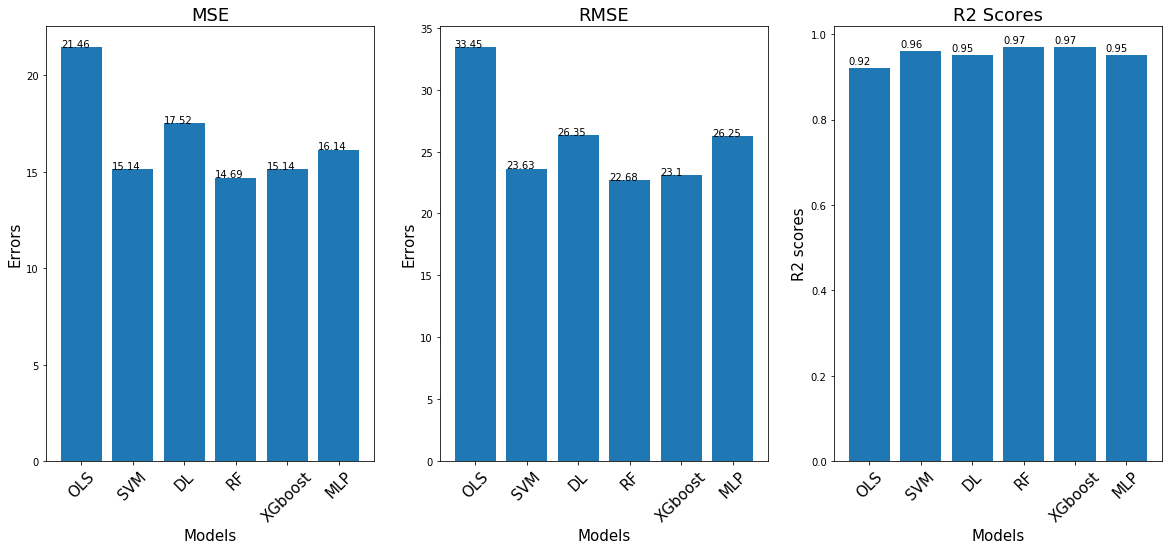

In [108]:
plt.figure(figsize=(20,8))
plt.subplot(131)
bar = plt.bar(models,mae)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("Errors", size=15)
plt.title("MSE" , size =18)
plt.xticks(size=15, rotation =45)

plt.subplot(132)
bar = plt.bar(models,rmse)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("Errors", size=15)
plt.title("RMSE" , size =18)
plt.xticks(size=15, rotation =45)


plt.subplot(133)
bar = plt.bar(models,r2)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("R2 scores", size=15)
plt.title("R2 Scores" , size =18)
plt.xticks(size=15, rotation =45)

plt.show()

#### BEST MODEL TO PREDICT YIELD STRENGTH PROPERTY

 We are getting least errors with Random Forest model having max_depth=20. 

In [109]:
rf_ys = RandomForestRegressor(random_state = 42, max_depth=20)
rf_ys.fit(X_train, y2_train)
train_pred_rf_ys = rf_ys.predict(X_train)   # predicting target on train data
test_pred_rf_ys = rf_ys.predict(X_test)     # predicting target on test data
    
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_rf_ys - y2_train)))/len(y2_train)
MAE_test = np.sum(np.absolute((test_pred_rf_ys - y2_test)))/len(y2_test)
print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

MAE on train data: 7.869810057665519
MAE on test data: 14.692315312496863


### PLOTTING ORIGINAL VALUES VS PREDICTED VALUES FOR YIELD STRENGTH

Text(0.5, 1.0, 'Visualization of actual vs predicted values for yield strength property')

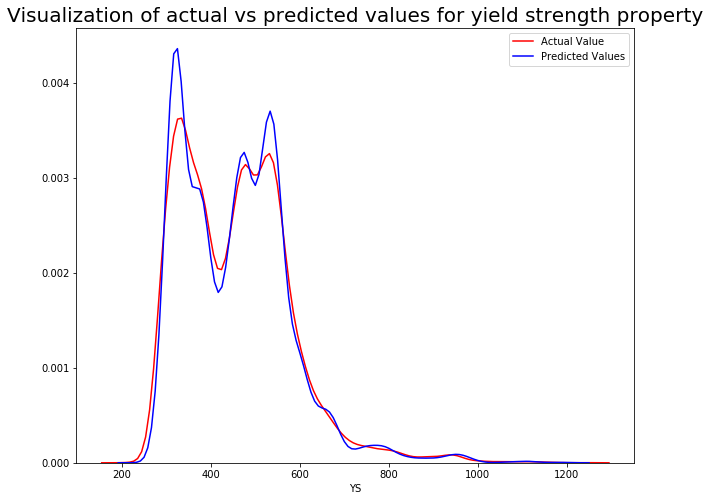

In [110]:

plt.figure(figsize=[10,8])
ax1 = sns.distplot(y2_test, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_rf_ys, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title("Visualization of actual vs predicted values for yield strength property", size=20)

## TARGET VARIABLE : ELONGATION (EL)

### MODEL(1): ORDINARY LEAST SQUARES

In [69]:
X1 = sm.add_constant(X_Norm ) #model needs intercept so adding column with 1s

# splitting data into train and test setafter having intercept
X1_train, X1_test, y3_train, y3_test =  train_test_split(X1, y3, test_size=0.3, random_state=42)

In [70]:
ols_en = sm.OLS(y3_train, X1_train) # fitting model on train data
results = ols_en.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     EL   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     4476.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        21:50:16   Log-Likelihood:            -1.3118e+05
No. Observations:               44213   AIC:                         2.624e+05
Df Residuals:                   44185   BIC:                         2.627e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [71]:
train_pred_ols_en = results.predict(X1_train)  # predicting target on train data
test_pred_ols_en = results.predict(X1_test)    # predicting target on test data

In [72]:
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_ols_en - y3_train)))/len(y3_train)
MAE_test = np.sum(np.absolute((test_pred_ols_en - y3_test)))/len(y3_test)

# Mean Squared Error on train and test data
RMSE_train = np.sqrt(np.mean((train_pred_ols_en - y3_train)**2))
RMSE_test = np.sqrt(np.mean((test_pred_ols_en - y3_test)**2))

# R2 Square score of train and test data
R2_train = 1 - ((y3_train-train_pred_ols_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
R2_test = 1 - ((y3_test-test_pred_ols_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

print("RMSE on train data:", RMSE_train)
print("RMSE on test data:", RMSE_test)

print("R2 on train data:", R2_train)
print("R2 on test data:", R2_test)

MAE on train data: 3.5373732219037333
MAE on test data: 3.585688451597243
RMSE on train data: 4.702027483980846
RMSE on test data: 4.877168845319234
R2 on train data: 0.732265654898829
R2 on test data: 0.7157942059312432


### MODEL(2): SUPPORT VECTOR MACHINES

In [73]:
svm_en1 = SVR(kernel='rbf', C=100, gamma='auto') # svm regressor with radial basis function kernel 
svm_en1.fit(X_train,y3_train)  # fitting train data 

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
train_pred_svm_en = svm_en1.predict(X_train)  # predicting target on train data
test_pred_svm_en = svm_en1.predict(X_test)    # predicting target on test data

In [75]:
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_svm_en - y3_train)))/len(y3_train)
MAE_test = np.sum(np.absolute((test_pred_svm_en - y3_test)))/len(y3_test)

# Mean Squared Error on train and test data
RMSE_train = np.sqrt(np.mean((train_pred_svm_en - y3_train)**2))
RMSE_test = np.sqrt(np.mean((test_pred_svm_en - y3_test)**2))

# R2 Square score of train and test data
R2_train = 1 - ((y3_train-train_pred_svm_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
R2_test = 1 - ((y3_test-test_pred_svm_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

print("RMSE on train data:", RMSE_train)
print("RMSE on test data:", RMSE_test)

print("R2 on train data:", R2_train)
print("R2 on test data:", R2_test)

MAE on train data: 2.5531487202802357
MAE on test data: 2.937753570726744
RMSE on train data: 3.714015568984769
RMSE on test data: 4.05532263306802
R2 on train data: 0.8329597237438127
R2 on test data: 0.8035065089476967


### MODEL(3): DECISION TREE REGRESSOR

- We are getting least error with max_depth=10 parameter.

In [79]:
# model implementation by tuning max_depth hyperparameter

depth = [1,5,10,20,50,100]
for i in depth:
    dt_en = DecisionTreeRegressor(random_state = 42, max_depth=i)
    dt_en.fit(X_train, y3_train)
    train_pred_dt_en = dt_en.predict(X_train) # predicting target on train data
    test_pred_dt_en = dt_en.predict(X_test)   # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_dt_en - y3_train)))/len(y3_train)
    MAE_test = np.sum(np.absolute((test_pred_dt_en - y3_test)))/len(y3_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_dt_en - y3_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_dt_en - y3_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y3_train-train_pred_dt_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
    R2_test = 1 - ((y3_test-test_pred_dt_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 4.915307720690485
MAE on test data: 4.959786374045863
RMSE on train data: 6.2118523988157115
RMSE on test data: 6.27031361322169
R2 on train data: 0.5327212673993365
R2 on test data: 0.5302401757180998


Max_depth: 5
MAE on train data: 3.539632269574761
MAE on test data: 3.580897085378651
RMSE on train data: 4.692620601441751
RMSE on test data: 4.7603183689474555
R2 on train data: 0.733335842702633
R2 on test data: 0.7292494521040611


Max_depth: 10
MAE on train data: 2.737843500903112
MAE on test data: 3.0357829315499982
RMSE on train data: 3.7125336790824943
RMSE on test data: 4.24149363155293
R2 on train data: 0.8330929950836069
R2 on test data: 0.7850512201197916


Max_depth: 20
MAE on train data: 0.9788521123388676
MAE on test data: 3.572254732094688
RMSE on train data: 1.776044056393867
RMSE on test data: 5.072455888872929
R2 on train data: 0.9618019468246273
R2 on test data: 0.6925787360942823


Max_depth: 50
MAE on train data: 0.00273675163413475

### MODEL(4): RANDOM FOREST REGRESSOR

- We are getting least error with max_depth=20 parameter.

In [80]:
# tuning of max_depth parameter

depth = [1,5,10,20,50,100]
for i in depth:
    rf_en = RandomForestRegressor(random_state = 42, max_depth=i)
    rf_en.fit(X_train, y3_train)
    train_pred_rf_en = rf_en.predict(X_train)  # predicting target on train data
    test_pred_rf_en = rf_en.predict(X_test)    # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_rf_en - y3_train)))/len(y3_train)
    MAE_test = np.sum(np.absolute((test_pred_rf_en - y3_test)))/len(y3_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_rf_en - y3_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_rf_en - y3_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y3_train-train_pred_rf_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
    R2_test = 1 - ((y3_test-test_pred_rf_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 4.908611324867317
MAE on test data: 4.953327077238731
RMSE on train data: 6.203508754935298
RMSE on test data: 6.260662077081519
R2 on train data: 0.5339757044609563
R2 on test data: 0.5316852117436732


Max_depth: 5
MAE on train data: 3.3830933637274048
MAE on test data: 3.427477136865376
RMSE on train data: 4.488553171235331
RMSE on test data: 4.557475142166344
R2 on train data: 0.7560243363368813
R2 on test data: 0.7518318959131194


Max_depth: 10
MAE on train data: 2.626247963924361
MAE on test data: 2.854527539904863
RMSE on train data: 3.5223578619110123
RMSE on test data: 3.9147137531528777
R2 on train data: 0.8497547628021839
R2 on test data: 0.8168961951326373


Max_depth: 20
MAE on train data: 1.4702604988875012
MAE on test data: 2.7798854760812826
RMSE on train data: 1.9715991494693694
RMSE on test data: 3.8551740782279458
R2 on train data: 0.9529270946444843
R2 on test data: 0.8224235653498333


Max_depth: 50
MAE on train data: 1.033247666516

### MODEL(5): XGBOOST REGRESSOR

- We are getting least error with max_depth=5 parameter.

In [81]:
# tuning of max_depth hyperparameter

depth = [1,5,10,20,50,100]
for i in depth:

    xgb_en = xgb.XGBRegressor(random_state = 42, max_depth=i)
    xgb_en.fit(X_train, y3_train)
    train_pred_xgb_en = xgb_en.predict(X_train)   # predicting target on train data
    test_pred_xgb_en = xgb_en.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_xgb_en - y3_train)))/len(y3_train)
    MAE_test = np.sum(np.absolute((test_pred_xgb_en - y3_test)))/len(y3_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_xgb_en - y3_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_xgb_en - y3_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y3_train-train_pred_xgb_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
    R2_test = 1 - ((y3_test-test_pred_xgb_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


    print("Max_depth:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



Max_depth: 1
MAE on train data: 3.363448896186557
MAE on test data: 3.409932744252008
RMSE on train data: 4.495072697553987
RMSE on test data: 4.570737042169344
R2 on train data: 0.7553150828825935
R2 on test data: 0.750385494553587


Max_depth: 5
MAE on train data: 2.5810181760163515
MAE on test data: 2.847885216790407
RMSE on train data: 3.4817294742156752
RMSE on test data: 3.9077409683541977
R2 on train data: 0.8532007598456659
R2 on test data: 0.8175478935487566


Max_depth: 10
MAE on train data: 1.2802251898667831
MAE on test data: 2.8993819016064997
RMSE on train data: 1.7600371075722303
RMSE on test data: 4.005889123722482
R2 on train data: 0.9624873790849161
R2 on test data: 0.8082677384721841


Max_depth: 20
MAE on train data: 0.005016972729446494
MAE on test data: 3.0338933252081643
RMSE on train data: 0.09499932667979216
RMSE on test data: 4.173708858252968
R2 on train data: 0.9998907114122302
R2 on test data: 0.791866662716125


Max_depth: 50
MAE on train data: 0.003151380

- We are getting least error with n_estimators=100 parameter.

In [111]:
# tuning no. of estimators

estimator = [10,50,100,500,1000]
for i in estimator:

    xgb_en = xgb.XGBRegressor(random_state = 42, max_depth=5, gamma = 0.1,  n_estimators= i )
    xgb_en.fit(X_train, y3_train)
    train_pred_xgb_en = xgb_en.predict(X_train)    # predicting target on train data
    test_pred_xgb_en = xgb_en.predict(X_test)      # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_xgb_en - y3_train)))/len(y3_train)
    MAE_test = np.sum(np.absolute((test_pred_xgb_en - y3_test)))/len(y3_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_xgb_en - y3_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_xgb_en - y3_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y3_train-train_pred_xgb_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
    R2_test = 1 - ((y3_test-test_pred_xgb_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


    print("estimators:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    



estimators: 10
MAE on train data: 3.1611410143277627
MAE on test data: 3.2249614899879058
RMSE on train data: 4.166907160901179
RMSE on test data: 4.281842772540123
R2 on train data: 0.7897377010525937
R2 on test data: 0.7809421716065565


estimators: 50
MAE on train data: 2.7250072798440876
MAE on test data: 2.880787707550292
RMSE on train data: 3.6816160039298005
RMSE on test data: 3.9361629847844277
R2 on train data: 0.8358613949996962
R2 on test data: 0.8148841985266775


estimators: 100
MAE on train data: 2.5810208538884485
MAE on test data: 2.847894352063308
RMSE on train data: 3.4817292410776446
RMSE on test data: 3.9077403609196577
R2 on train data: 0.8532007795051414
R2 on test data: 0.817547950270891


estimators: 500
MAE on train data: 1.956052415467413
MAE on test data: 2.868867180015149
RMSE on train data: 2.625183476395637
RMSE on test data: 3.963530213382184
R2 on train data: 0.9165448612101182
R2 on test data: 0.8123011153528301


estimators: 1000
MAE on train data: 1.5

### MODEL(6): MLP REGRESSOR

- Implementing MLP regressor with 2 hidden layer having 100 hidden neurons in each layer. 
- We are getting least error with max_iter=50 parameter.

In [83]:
iterations = [10,50,100,500,1000,5000]

for i in iterations:

    mlp_en = MLPRegressor(hidden_layer_sizes=(100,100 ), activation='relu',random_state=1, max_iter=i, alpha=1 )
    mlp_en.fit(X_train, y3_train)
    train_pred_mlp_en = mlp_en.predict(X_train)   # predicting target on train data
    test_pred_mlp_en = mlp_en.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_mlp_en - y3_train)))/len(y3_train)
    MAE_test = np.sum(np.absolute((test_pred_mlp_en - y3_test)))/len(y3_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_mlp_en - y3_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_mlp_en - y3_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y3_train-train_pred_mlp_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
    R2_test = 1 - ((y3_test-test_pred_mlp_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


    print("max_iteration:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    

C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 10
MAE on train data: 3.1302987115579075
MAE on test data: 3.206208345157913
RMSE on train data: 4.241844980179211
RMSE on test data: 5.570213817770534
R2 on train data: 0.7821069662268156
R2 on test data: 0.6292842152377366




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 50
MAE on train data: 2.9365433573978272
MAE on test data: 3.067095197974394
RMSE on train data: 3.981431006539082
RMSE on test data: 4.839637684558772
R2 on train data: 0.8080393780756967
R2 on test data: 0.7201514601374744




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


max_iteration: 100
MAE on train data: 2.8321088680191924
MAE on test data: 3.006665815768105
RMSE on train data: 3.854670696194395
RMSE on test data: 4.952958166063422
R2 on train data: 0.8200680344211728
R2 on test data: 0.7068926794181872


max_iteration: 500
MAE on train data: 2.8206063296862047
MAE on test data: 3.013693593320323
RMSE on train data: 3.847288063667545
RMSE on test data: 5.030508822121287
R2 on train data: 0.8207566014137171
R2 on test data: 0.6976422007043301


max_iteration: 1000
MAE on train data: 2.8206063296862047
MAE on test data: 3.013693593320323
RMSE on train data: 3.847288063667545
RMSE on test data: 5.030508822121287
R2 on train data: 0.8207566014137171
R2 on test data: 0.6976422007043301


max_iteration: 5000
MAE on train data: 2.8206063296862047
MAE on test data: 3.013693593320323
RMSE on train data: 3.847288063667545
RMSE on test data: 5.030508822121287
R2 on train data: 0.8207566014137171
R2 on test data: 0.6976422007043301




- We are getting least error with alpha=0.5 parameter.

In [84]:
alpha = [0.001, 0.01, 0.1, 0.5,1]

for i in alpha:

    mlp_en = MLPRegressor(hidden_layer_sizes=(100,100 ), activation='relu',random_state=1, max_iter=50, alpha=i )
    mlp_en.fit(X_train, y3_train)
    train_pred_mlp_en = mlp_en.predict(X_train)   # predicting target on train data
    test_pred_mlp_en = mlp_en.predict(X_test)     # predicting target on test data
    
    # Mean Absolute Error on train and test data
    MAE_train = np.sum(np.absolute((train_pred_mlp_en - y3_train)))/len(y3_train)
    MAE_test = np.sum(np.absolute((test_pred_mlp_en - y3_test)))/len(y3_test)

    # Mean Squared Error on train and test data
    RMSE_train = np.sqrt(np.mean((train_pred_mlp_en - y3_train)**2))
    RMSE_test = np.sqrt(np.mean((test_pred_mlp_en - y3_test)**2))

    # R2 Square score of train and test data
    R2_train = 1 - ((y3_train-train_pred_mlp_en)**2).sum()/((y3_train-y3_train.mean())**2).sum()
    R2_test = 1 - ((y3_test-test_pred_mlp_en)**2).sum()/((y3_test-y3_test.mean())**2).sum()


    print("alpha value:", i)
    print("MAE on train data:", MAE_train)
    print("MAE on test data:", MAE_test)

    print("RMSE on train data:", RMSE_train)
    print("RMSE on test data:", RMSE_test)

    print("R2 on train data:", R2_train)
    print("R2 on test data:", R2_test)
    
    print("\n")
    

C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha value: 0.001
MAE on train data: 2.892116370575624
MAE on test data: 3.043492861183078
RMSE on train data: 3.926348289672389
RMSE on test data: 5.168273445291387
R2 on train data: 0.813314149593281
R2 on test data: 0.6808548031829613




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha value: 0.01
MAE on train data: 2.916106000184812
MAE on test data: 3.059273910742673
RMSE on train data: 3.957937777848289
RMSE on test data: 4.785793192687166
R2 on train data: 0.81029809830456
R2 on test data: 0.7263438573747973




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha value: 0.1
MAE on train data: 2.8986553861145667
MAE on test data: 3.0451525485878252
RMSE on train data: 3.934563159527786
RMSE on test data: 4.8744855404000385
R2 on train data: 0.8125321485161378
R2 on test data: 0.7161068467456613




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha value: 0.5
MAE on train data: 2.904907026211255
MAE on test data: 3.042874725804133
RMSE on train data: 3.946560291993786
RMSE on test data: 4.773669479092022
R2 on train data: 0.8113871647103155
R2 on test data: 0.7277285918209058




C:\Users\Panch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha value: 1
MAE on train data: 2.9365433573978272
MAE on test data: 3.067095197974394
RMSE on train data: 3.981431006539082
RMSE on test data: 4.839637684558772
R2 on train data: 0.8080393780756967
R2 on test data: 0.7201514601374744




## COMPARISION PLOT OF TEST ERRORS OF DIFFERENT MODELS FOR YS:

In [112]:
models = ['OLS', 'SVM','DL','RF','XGboost','MLP']
mae = [3.58,2.93,3.03,2.77,2.84,3.04]
rmse = [4.87,4.05,4.24,3.85,3.90,4.77]
r2 = [0.71,0.80,0.78,0.82,0.81,0.72]

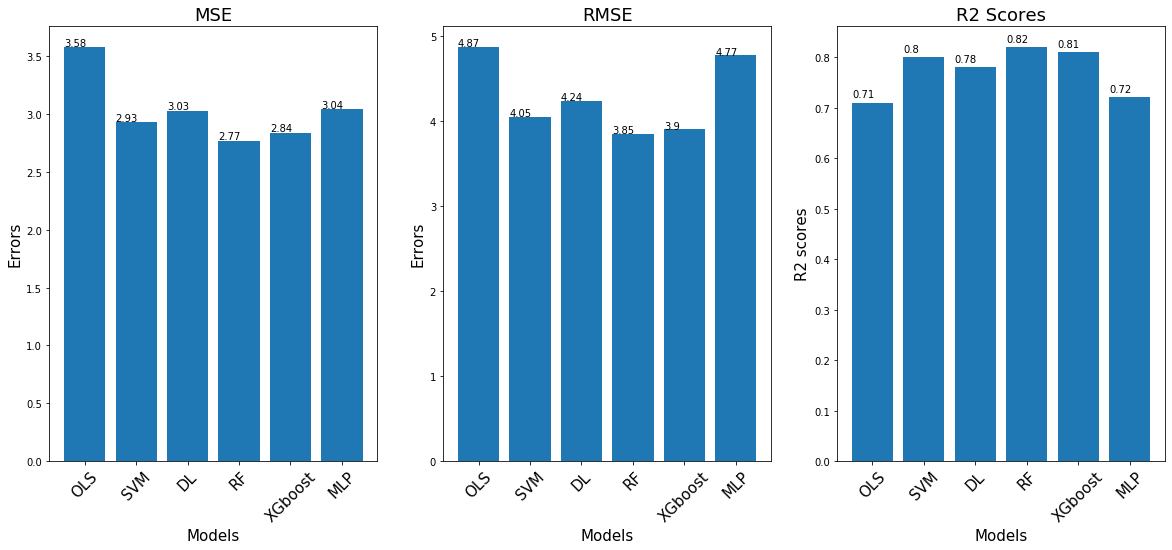

In [113]:
plt.figure(figsize=(20,8))
plt.subplot(131)
bar = plt.bar(models,mae)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("Errors", size=15)
plt.title("MSE" , size =18)
plt.xticks(size=15, rotation =45)

plt.subplot(132)
bar = plt.bar(models,rmse)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("Errors", size=15)
plt.title("RMSE" , size =18)
plt.xticks(size=15, rotation =45)


plt.subplot(133)
bar = plt.bar(models,r2)
for bar in bar:
    values = bar.get_height()
    plt.text(bar.get_x(), values + 0.01,values)
plt.xlabel("Models", size=15)
plt.ylabel("R2 scores", size=15)
plt.title("R2 Scores" , size =18)
plt.xticks(size=15, rotation =45)

plt.show()

#### BEST MODEL TO PREDICT ELONGATION PROPERTY

 - We are getting least errors with Random Forest model having max_depth=20.

In [114]:
rf_en = RandomForestRegressor(random_state = 42, max_depth=20)
rf_en.fit(X_train, y3_train)
train_pred_rf_en = rf_en.predict(X_train)  # predicting target on train data
test_pred_rf_en = rf_en.predict(X_test)    # predicting target on test data
    
# Mean Absolute Error on train and test data
MAE_train = np.sum(np.absolute((train_pred_rf_en - y3_train)))/len(y3_train)
MAE_test = np.sum(np.absolute((test_pred_rf_en - y3_test)))/len(y3_test)

print("MAE on train data:", MAE_train)
print("MAE on test data:", MAE_test)

MAE on train data: 1.4702604988875012
MAE on test data: 2.7798854760812826


### PLOTTING ORIGINAL VALUES VS PREDICTED VALUES FOR ELONGATION

Text(0.5, 1.0, 'Visualization of actual vs predicted values for elongation property')

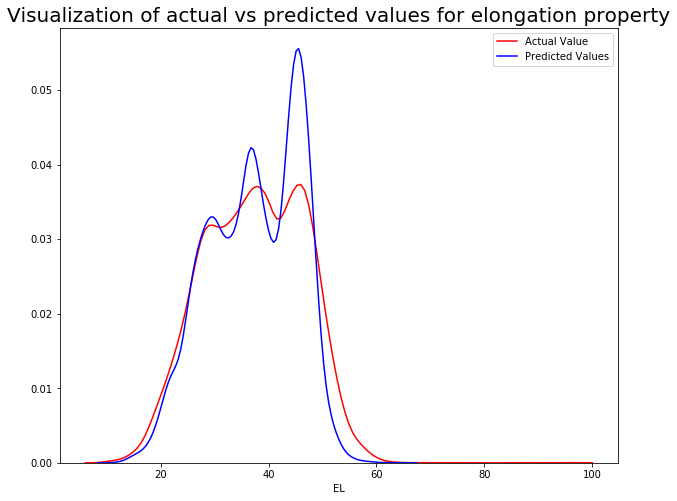

In [115]:

plt.figure(figsize=[10,8])
ax1 = sns.distplot(y3_test, hist=False, color="r", label="Actual Value")
sns.distplot(test_pred_rf_en, hist=False, color="b", label="Predicted Values" , ax=ax1)

plt.title("Visualization of actual vs predicted values for elongation property", size=20)